Portuguse version: https://bit.ly/2y04JMS

Dataset by: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

ps: variable names is in portuguese in the future they will be translated as well


In [2]:
import datetime
# Last execution:
print(f'Last execution: {datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")}')


Last execution: 09/05/2020 11:36:26


# Changelog

version control in GIT, clicking on the version number will take you to the corresponding repository

---
v1.0 

*   Initial Version



[v1.0.1](https://github.com/Luscahm/covid_prediction/tree/V1.0.1)


*   Bugs fix   

[v1.1](git.com.br) 
*   Enhanced Brazil predict of cases and death
*   Texts translated to english
*   Delete useless imports
*   Bugs fix

[v2.0](https://github.com/Luscahm/covid_prediction/tree/v2.0.x)
* Improvement in some graphics
* New Graphics
* Improvement in the results presentation tables
* Improved forecasting of cases and deaths in the USA
* Added "About Me" section

[v3.0](https://github.com/Luscahm/covid_prediction/tree/v3.0.x)
* Improvements in some graphics
* "Bar Chart race" views
* log-scale graph for evolution of deaths and cases
* mortality chart
* graph of new cases per day
* chart of new deaths per day
* Change of the prediction algorithm for death and cases in all countries
* More graphics
* Added Introduction
* Bug fixes


#Introduction


At the beginning of March, Brazil recorded its first case of covid-19, which many thought was just an Asian disease, finally arrived in my territory, and since then, the situation in Brazil has only worsened, with records and records of deaths and cases.

Right at the beginning of the pandemic in Brazil, universities stopped, and I see the uncertainty that hangs in the air until today "what are we facing and how far can it go?" it is with this doubt in mind, that I decided to analyze the data available not only for Brazil, but also countries that suffered a lot with the virus and that I thought was similar to Brazil, so here we will analyze and compare Brazil, USA, Italy and Sweden, and after this little analysis try to predict the next numbers of the disease for these 4 countries, and compare them, so to try to at least clear up the doubt that has been hovering in the air for months


---



Disclaimer / Legal Notice: This information should serve the interested parties as a first guideline. The general information contained herein, however, does not provide any warranty. Thus, the guarantee or liability of any kind is excluded, for example, of accuracy, reliability, completeness and timeliness of the information.


---



---

In [3]:
import numpy as np
import pandas as pd
import itertools    
import IPython

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
import bokeh 
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.models import Span
from bokeh.io import output_notebook


plt.style.use('seaborn-darkgrid')
output_notebook(resources=INLINE)

Loading BokehJS ...

# Data Reading


---



* Transform the csv available on Git into a pandas dataframe
*   Split in 4 Dataframe: 
      1.   Brazil
      2.   US
      3.   Sweden
      4.   Italy


*   Remove parts of the dataframe that will not be used
*   we will use 3 dataframe for each country: Confirmed, Deaths and Recovered









In [0]:
url_confirmados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_mortes = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recuperados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_confirmados = pd.read_csv(url_confirmados)
df_mortes = pd.read_csv(url_mortes)
df_recuperados = pd.read_csv(url_recuperados)

In [5]:
df_confirmados.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  \
0        0        0        0  ...     1939     2171    2335    2469    2704   
1        0        0        0  ...      766      773     782     789     795   
2        0        0        0  ...     3848     4006    4154    4295    4474   
3        0        0        0  ...      743      745     745     747     748   
4        0        0        0  ...       27       27      30      35      35   

   5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  
0    2894    3224    3392    3563    3778  
1     803     820     832     842     850  
2    4648    4838    4997    5182    5369  
3     750     751     751     752     752  
4      35      36      36      36      43  

[5 rows x 112 columns]

In [0]:
# split dataframe in locals dataframe

df_confirmados_brasil = df_confirmados.loc[df_confirmados['Country/Region'] == 'Brazil'].copy()
df_confirmados_italia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Italy'].copy()
df_confirmados_eua = df_confirmados.loc[df_confirmados['Country/Region'] == 'US'].copy()
df_confirmados_suecia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_mortes_brasil = df_mortes.loc[df_mortes['Country/Region'] == 'Brazil'].copy()
df_mortes_italia = df_mortes.loc[df_mortes['Country/Region'] == 'Italy'].copy()
df_mortes_eua = df_mortes.loc[df_mortes['Country/Region'] == 'US'].copy()
df_mortes_suecia = df_mortes.loc[df_mortes['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_recuperados_brasil = df_recuperados.loc[df_recuperados['Country/Region'] == 'Brazil'].copy()
df_recuperados_italia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Italy'].copy()
df_recuperados_eua = df_recuperados.loc[df_recuperados['Country/Region'] == 'US'].copy()
df_recuperados_suecia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Sweden'].copy()

In [7]:
df_confirmados_brasil.head()

Province/State Country/Region     Lat     Long  1/22/20  1/23/20  1/24/20  \
28            NaN         Brazil -14.235 -51.9253        0        0        0   

    1/25/20  1/26/20  1/27/20  ...  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  \
28        0        0        0  ...    79685    87187   92202   97100  101826   

    5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  
28  108620  115455  126611  135773  146894  

[1 rows x 112 columns]

In [8]:
df_confirmados_italia.head()

Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
137            NaN          Italy  43.0  12.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  \
137        0        0        0  ...   203591   205463  207428  209328  210717   

     5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  
137  211938  213013  214457  215858  217185  

[1 rows x 112 columns]

In [9]:
df_confirmados_eua.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
225            NaN             US  37.0902 -95.7129        1        1   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/29/20  4/30/20   5/1/20  \
225        2        2        5        5  ...  1039909  1069424  1103461   

      5/2/20   5/3/20   5/4/20   5/5/20   5/6/20   5/7/20   5/8/20  
225  1132539  1158040  1180375  1204351  1228603  1257023  1283929  

[1 rows x 112 columns]

In [10]:
df_confirmados_suecia.head()

Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
205            NaN         Sweden  63.0  16.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  \
205        0        0        0  ...    20302    21092   21520   22082   22317   

     5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  
205   22721   23216   23918   24623   25265  

[1 rows x 112 columns]

In [0]:
# Making all dataframes started 1 day after 1º case of covid
df_confirmados_brasil = df_confirmados_brasil.iloc[:,39:]
df_confirmados_eua = df_confirmados_eua.iloc[:,4:]
df_confirmados_italia = df_confirmados_italia.iloc[:,12:]
df_confirmados_suecia = df_confirmados_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_mortes_brasil = df_mortes_brasil.iloc[:,39:]
df_mortes_eua = df_mortes_eua.iloc[:,4:]
df_mortes_italia = df_mortes_italia.iloc[:,12:]
df_mortes_suecia = df_mortes_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_recuperados_brasil = df_recuperados_brasil.iloc[:,39:]
df_recuperados_eua = df_recuperados_eua.iloc[:,4:]
df_recuperados_italia = df_recuperados_italia.iloc[:,12:]
df_recuperados_suecia = df_recuperados_suecia.iloc[:,13:]

# Data Processing

 Machine learning algorithm does not accept dates in the MM/DD/YY format, we will perform some treatments in these dataframes to get what we want, we will perform the following steps:


*  Extract columns index
*   Extract case numbers from each country
*   transform dates into calendar days, 1st day of covid = 0, second = 1 ...
*   Choose how many calendar days in the future we want to make the prediction
*   Transform the calendar days to mm/dd/yy format
*   Transpose all dataframes










In [0]:
# Geting the index columns
index_brasil = list(df_confirmados_brasil.columns.values) 
index_italia = list(df_confirmados_italia.columns.values) 
index_eua = list(df_confirmados_eua.columns.values) 
index_suecia = list(df_confirmados_suecia.columns.values) 

In [0]:
# geting  values ​​of all brazil df to assist in the construction of graphics:
casos_brasil = []
mortes_brasil = []
recuperados_brasil = []
for i in index_brasil:
    confirmados_brasil = df_confirmados_brasil[i].sum()
    casos_brasil.append(confirmados_brasil)
    
    mortos_brasil = df_mortes_brasil[i].sum()
    mortes_brasil.append(mortos_brasil)
    
    recupera_brasil = df_recuperados_brasil[i].sum()
    recuperados_brasil.append(recupera_brasil)

In [0]:
# making the same for us
casos_eua = []
mortes_eua = []
recuperados_eua = []

for i in index_eua:
    confirmados_eua = df_confirmados_eua[i].sum()
    casos_eua.append(confirmados_eua)
    
    mortos_eua = df_mortes_eua[i].sum()
    mortes_eua.append(mortos_eua)

    recupera_eua = df_recuperados_eua[i].sum()
    recuperados_eua.append(recupera_eua)


In [0]:
# making the same for Italy
casos_italia = []
mortes_italia = []
recuperados_italia = []

for i in index_italia:

    confirmados_italia = df_confirmados_italia[i].sum()
    casos_italia.append(confirmados_italia)
    
    mortos_italia = df_mortes_italia[i].sum()
    mortes_italia.append(mortos_italia)
    
    recupera_italia = df_recuperados_italia[i].sum()
    recuperados_italia.append(recupera_italia)
   
    
    

In [0]:
# making the same for Sweden
casos_suecia  = []
mortes_suecia  = []
recuperados_suecia  = []
for i in index_suecia:
    confirmados_suecia = df_confirmados_suecia[i].sum()
    casos_suecia.append(confirmados_suecia)
    
    mortos_suecia = df_mortes_suecia[i].sum()
    mortes_suecia.append(mortos_suecia)

    recupera_suecia = df_recuperados_suecia[i].sum()
    recuperados_suecia.append(recupera_suecia)

In [0]:
# transform dates into a numpy array of calendar days:
dias_brasil = np.array([i for i in range(len(index_brasil))]).reshape(-1, 1)
dias_eua = np.array([i for i in range(len(index_eua))]).reshape(-1, 1)
dias_italia = np.array([i for i in range(len(index_italia))]).reshape(-1, 1)
dias_suecia = np.array([i for i in range(len(index_suecia))]).reshape(-1, 1)

In [0]:
futuro = 40 # this variable defines how many days ahead we want to predict.

# making future dates in a calendar day numpy array
futuro_brasil = np.array([i for i in range(len(index_brasil) + futuro)]).reshape(-1, 1)
futuro_eua = np.array([i for i in range(len(index_eua) + futuro)]).reshape(-1, 1)
futuro_italia = np.array([i for i in range(len(index_italia) + futuro)]).reshape(-1, 1)
futuro_suecia = np.array([i for i in range(len(index_suecia) + futuro)]).reshape(-1, 1)

In [0]:
# transforming future calendar day in mm/dd/yy format
start_br = '2/26/20'
start_br = datetime.datetime.strptime(start_br,"%m/%d/%y")
datas_futuras_br = []
for i in range(len(futuro_brasil)):
    datas_futuras_br.append((start_br + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_us = '1/22/20'
start_us = datetime.datetime.strptime(start_us,"%m/%d/%y")
datas_futuras_us = []
for i in range(len(futuro_eua)):
    datas_futuras_us.append((start_us + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_it = '1/30/20'
start_it = datetime.datetime.strptime(start_it,"%m/%d/%y")
datas_futuras_it = []
for i in range(len(futuro_italia)):
    datas_futuras_it.append((start_it + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_su = '1/31/20'
start_su = datetime.datetime.strptime(start_su,"%m/%d/%y")
datas_futuras_su = []
for i in range(len(futuro_suecia)):
    datas_futuras_su.append((start_su + datetime.timedelta(days=i)).strftime('%m/%d/%y'))

In [0]:
# transposing all dataframes
df_confirmados_brasil = df_confirmados_brasil.T
df_confirmados_brasil['dates'] = index_brasil

df_mortes_brasil = df_mortes_brasil.T
df_mortes_brasil['dates'] = index_brasil

df_recuperados_brasil = df_recuperados_brasil.T
df_recuperados_brasil['dates'] = index_brasil

new_index_br = [x for x in range(len(index_brasil))]
#----------------------------------------------------
df_confirmados_eua = df_confirmados_eua.T
df_confirmados_eua['dates'] = index_eua

df_mortes_eua = df_mortes_eua.T
df_mortes_eua['dates'] = index_eua

df_recuperados_eua = df_recuperados_eua.T
df_recuperados_eua['dates'] = index_eua

new_index_eua = [x for x in range(len(index_eua))]
#----------------------------------------------------
df_confirmados_italia = df_confirmados_italia.T
df_confirmados_italia['dates'] = index_italia

df_mortes_italia = df_mortes_italia.T
df_mortes_italia['dates'] = index_italia

df_recuperados_italia = df_recuperados_italia.T
df_recuperados_italia['dates'] = index_italia

new_index_it = [x for x in range(len(index_italia))]
#----------------------------------------------------
df_confirmados_suecia = df_confirmados_suecia.T
df_confirmados_suecia['dates'] = index_suecia

df_mortes_suecia = df_mortes_suecia.T
df_mortes_suecia['dates'] = index_suecia

df_recuperados_suecia = df_recuperados_suecia.T
df_recuperados_suecia['dates'] = index_suecia
new_index_su = [x for x in range(len(index_suecia))]


In [21]:
df_confirmados_brasil.head()


28    dates
2/26/20   1  2/26/20
2/27/20   1  2/27/20
2/28/20   1  2/28/20
2/29/20   2  2/29/20
3/1/20    2   3/1/20

In [0]:
# as we have seen the indexes are wrong, we will fix them now.

df_confirmados_brasil['index'] = new_index_br
df_confirmados_brasil = df_confirmados_brasil.set_index('index')
df_confirmados_brasil.rename(columns={28:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_brasil.index.name = None
df_confirmados_brasil['dates'] = dias_brasil

df_mortes_brasil['index'] = new_index_br
df_mortes_brasil = df_mortes_brasil.set_index('index')
df_mortes_brasil.rename(columns={28:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_brasil.index.name = None
df_mortes_brasil['dates'] = dias_brasil

df_recuperados_brasil['index'] = new_index_br
df_recuperados_brasil = df_recuperados_brasil.set_index('index')
df_recuperados_brasil.rename(columns={29:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_brasil.index.name = None
df_recuperados_brasil['dates'] = dias_brasil

#------------------------------------------------
df_confirmados_eua['index'] = new_index_eua
df_confirmados_eua = df_confirmados_eua.set_index('index')
df_confirmados_eua.rename(columns={225:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_eua.index.name = None
df_confirmados_eua['dates'] = dias_eua

df_mortes_eua['index'] = new_index_eua
df_mortes_eua = df_mortes_eua.set_index('index')
df_mortes_eua.rename(columns={225:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_eua.index.name = None
df_mortes_eua['dates'] = dias_eua

df_recuperados_eua['index'] = new_index_eua
df_recuperados_eua = df_recuperados_eua.set_index('index')
df_recuperados_eua.rename(columns={225:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_eua.index.name = None
df_recuperados_eua['dates'] = dias_eua
#------------------------------------------------
df_confirmados_italia['index'] = new_index_it
df_confirmados_italia = df_confirmados_italia.set_index('index')
df_confirmados_italia.rename(columns={137:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_italia.index.name = None
df_confirmados_italia['dates'] = dias_italia

df_mortes_italia['index'] = new_index_it
df_mortes_italia = df_mortes_italia.set_index('index')
df_mortes_italia.rename(columns={137:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_italia.index.name = None
df_mortes_italia['dates'] = dias_italia

df_recuperados_italia['index'] = new_index_it
df_recuperados_italia = df_recuperados_italia.set_index('index')
df_recuperados_italia.rename(columns={131:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_italia.index.name = None
df_recuperados_italia['dates'] = dias_italia
#------------------------------------------------
df_confirmados_suecia['index'] = new_index_su
df_confirmados_suecia = df_confirmados_suecia.set_index('index')
df_confirmados_suecia.rename(columns={205:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_suecia.index.name = None
df_confirmados_suecia['dates'] = dias_suecia

df_mortes_suecia['index'] = new_index_su
df_mortes_suecia = df_mortes_suecia.set_index('index')
df_mortes_suecia.rename(columns={205:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_suecia.index.name = None
df_mortes_suecia['dates'] = dias_suecia

df_recuperados_suecia['index'] = new_index_su
df_recuperados_suecia = df_recuperados_suecia.set_index('index')
df_recuperados_suecia.rename(columns={203:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_suecia.index.name = None
df_recuperados_suecia['dates'] = dias_suecia

below, we will see the dataframes transposed



In [23]:
df_confirmados_brasil.head()

cases  dates
0      1      0
1      1      1
2      1      2
3      2      3
4      2      4

In [24]:
df_mortes_eua.head()

deaths  dates
0       0      0
1       0      1
2       0      2
3       0      3
4       0      4

In [25]:
df_recuperados_suecia.head()

recovery  dates
0         0      0
1         0      1
2         0      2
3         0      3
4         0      4

In [26]:
df_mortes_italia.head()

deaths  dates
0       0      0
1       0      1
2       0      2
3       0      3
4       0      4

the part of separating target data, and separating in train and test will be done in the prediction section


# Graphic Presentation

In this section, a few graphs will be presented that will help us to understand the situation of the covid-19 in the 4 selected countries



## Cases

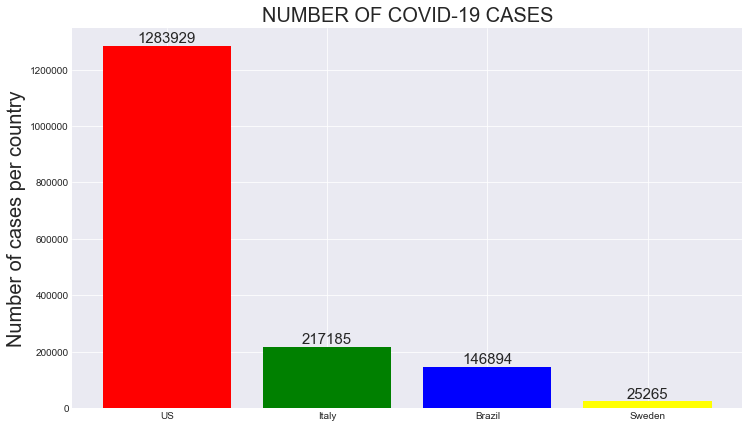

In [27]:
fig = plt.figure(figsize=(12, 7))
country = ['US', 'Italy', 'Brazil', 'Sweden']
numbers = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
rects = plt.bar(country,numbers, align='center', color=['red', 'green', 'blue', 'yellow'])

ax = rects.patches
for rect, label in zip(ax, numbers):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    

plt.ylabel('Number of cases per country', size = 20)
plt.title('NUMBER OF COVID-19 CASES', size=20)
plt.show()

In [28]:
print('comparison of cases in the 4 countries')
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2200988" data-url="https://flo.uri.sh/visualisation/2200988/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

comparison of cases in the 4 countries


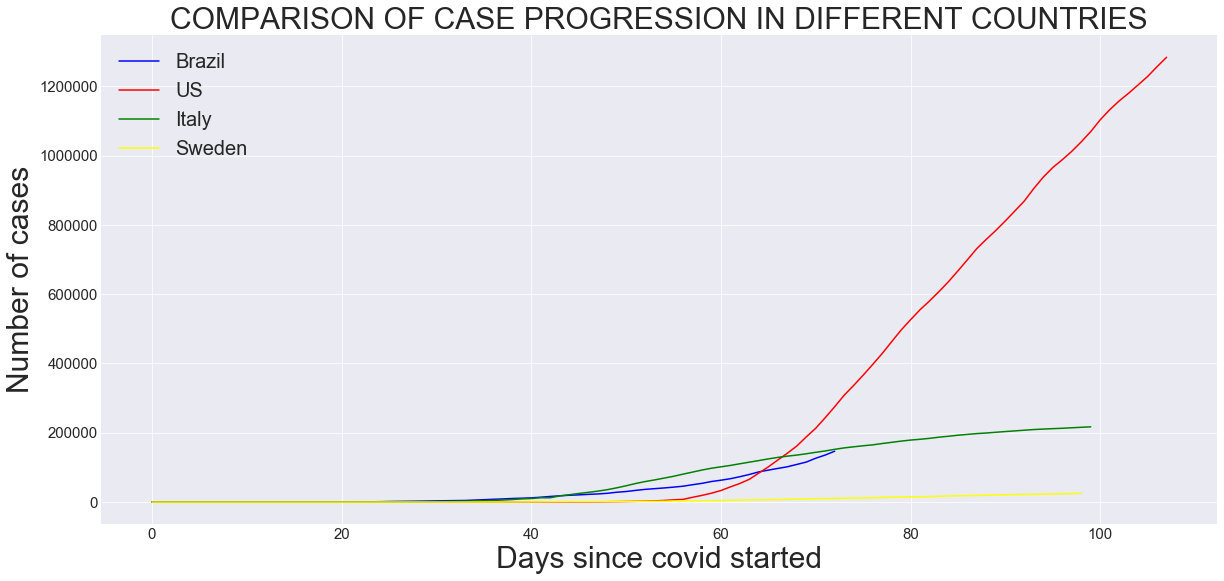

In [29]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')

plt.title('COMPARISON OF CASE PROGRESSION IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Sweden looks almost like a straight line when comparing with USA and Italy, Brazil is also very discreet next to Italy and USA, ahead we will compare  the log graphic and these countries 2 to 2

In [0]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(casos_eua)))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(casos_italia)))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(casos_brasil)))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(casos_suecia)))
next(conf_su2)

diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]



antes_30_eua = []
for index,conteudo in enumerate(diferenca_eua):
    if conteudo >= 30:
        antes_30_eua.append(index)
eua_day = [i for i in range(len(antes_30_eua))]

antes_30_br = []
for index,conteudo in enumerate(diferenca_brasil):
    if conteudo >= 30:
        antes_30_br.append(index)
br_day = [i for i in range(len(antes_30_br))]

antes_30_su = []
for index,conteudo in enumerate(diferenca_suecia):
    if conteudo >= 30:
        antes_30_su.append(index)
su_day = [i for i in range(len(antes_30_su))]

antes_30_it = []
for index,conteudo in enumerate(diferenca_italia):
    if conteudo >= 30:
        antes_30_it.append(index)
it_day = [i for i in range(len(antes_30_it))]


In [32]:
p1 = figure(plot_width=800, plot_height=550, title="Logarithmic covid-19 trajectory",
             x_range=(0, 100), y_axis_type="log")
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Days after increasing 30 daily cases'
p1.yaxis.axis_label = 'Progression of cases (logarithmic scale)'
p1.xaxis.minor_tick_line_width = 0


p1.line(br_day, casos_brasil[18:], color='#3E4CC3', 
        legend_label='Brazil', line_width=1)
p1.circle(br_day[-1], casos_brasil[-1], fill_color="white", size=5)

p1.line(eua_day, casos_eua[41:], color='#F54138', 
        legend_label='United States', line_width=1)
p1.circle(eua_day[-1], casos_eua[-1], fill_color="white", size=5)

p1.line(su_day, casos_suecia[35:], color='#DBAE23', 
        legend_label='Sweden', line_width=1)
p1.circle(su_day[-1], casos_suecia[-1], fill_color="white", size=5)


p1.line(it_day, casos_italia[24:], color='#3EC358', 
        legend_label='Ialy', line_width=1)
p1.circle(it_day[-1], casos_italia[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

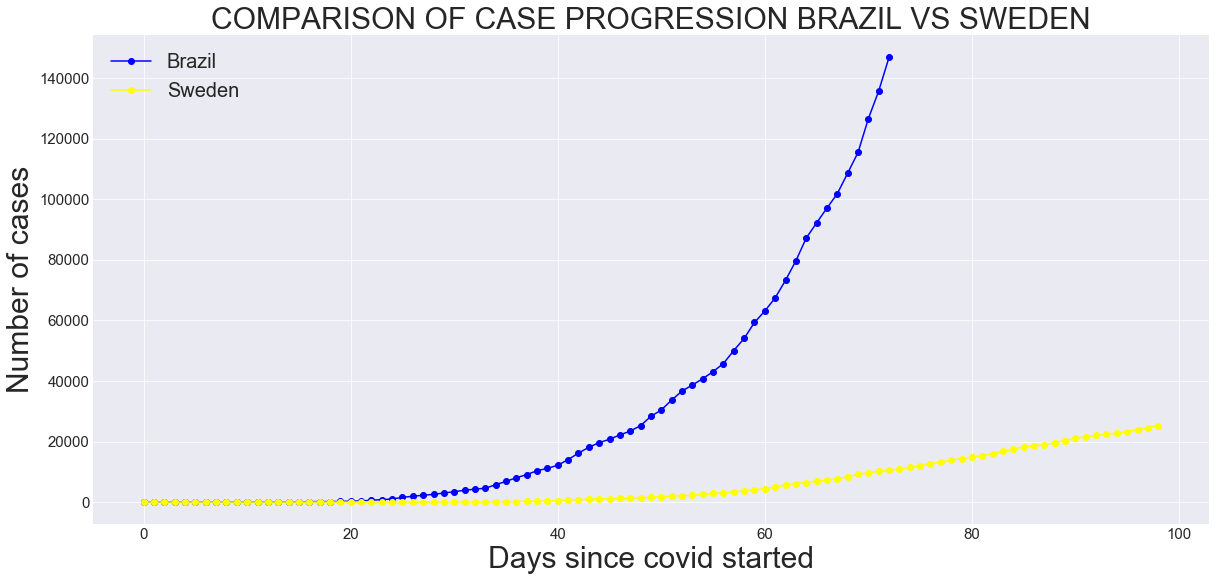

In [33]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, marker='o', color='blue')
plt.plot(dias_suecia, casos_suecia, marker='o', color='yellow')


plt.title('COMPARISON OF CASE PROGRESSION BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


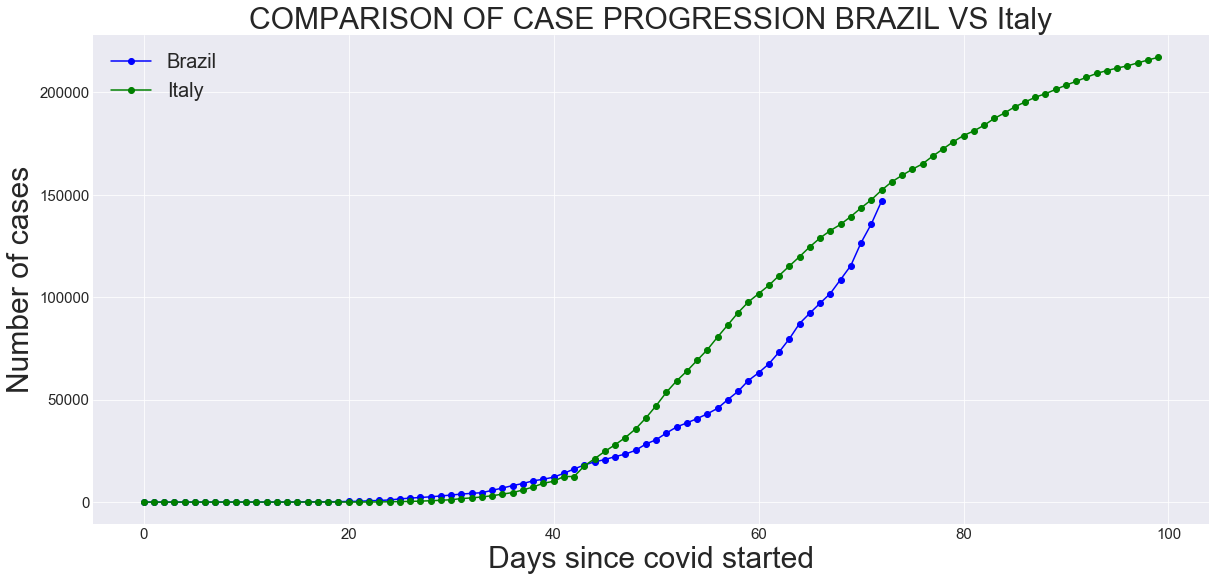

In [34]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, marker='o', color='blue')
plt.plot(dias_italia, casos_italia, marker='o', color='green')

plt.title('COMPARISON OF CASE PROGRESSION BRAZIL VS Italy', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'Italy'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


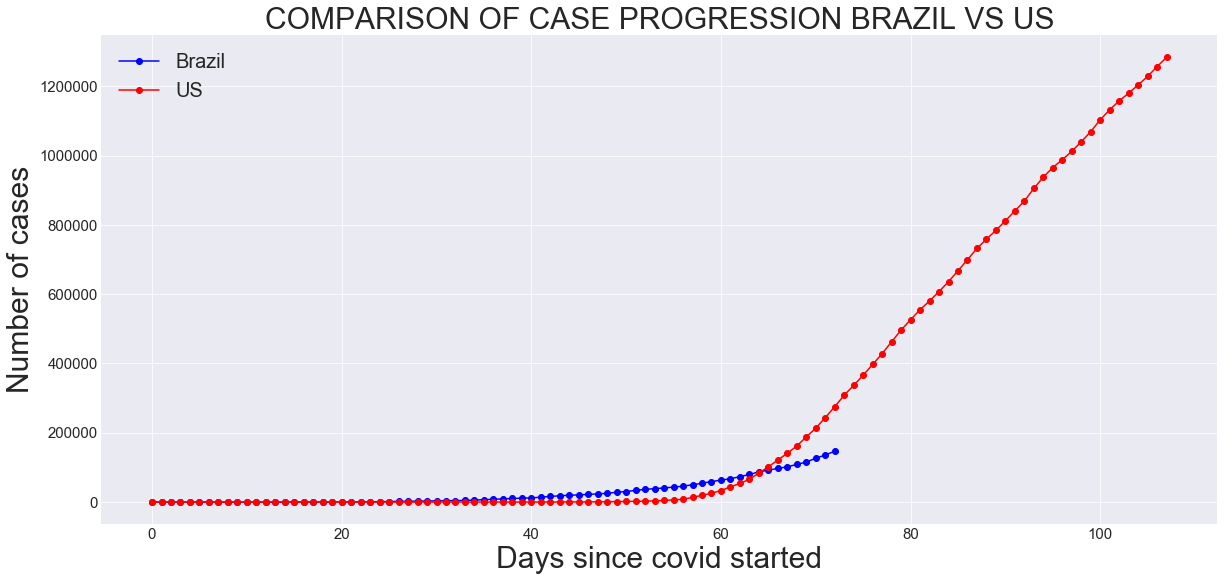

In [35]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, marker='o', color='blue')
plt.plot(dias_eua, casos_eua, marker='o', color='red')

plt.title('COMPARISON OF CASE PROGRESSION BRAZIL VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Brazil', 'US'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


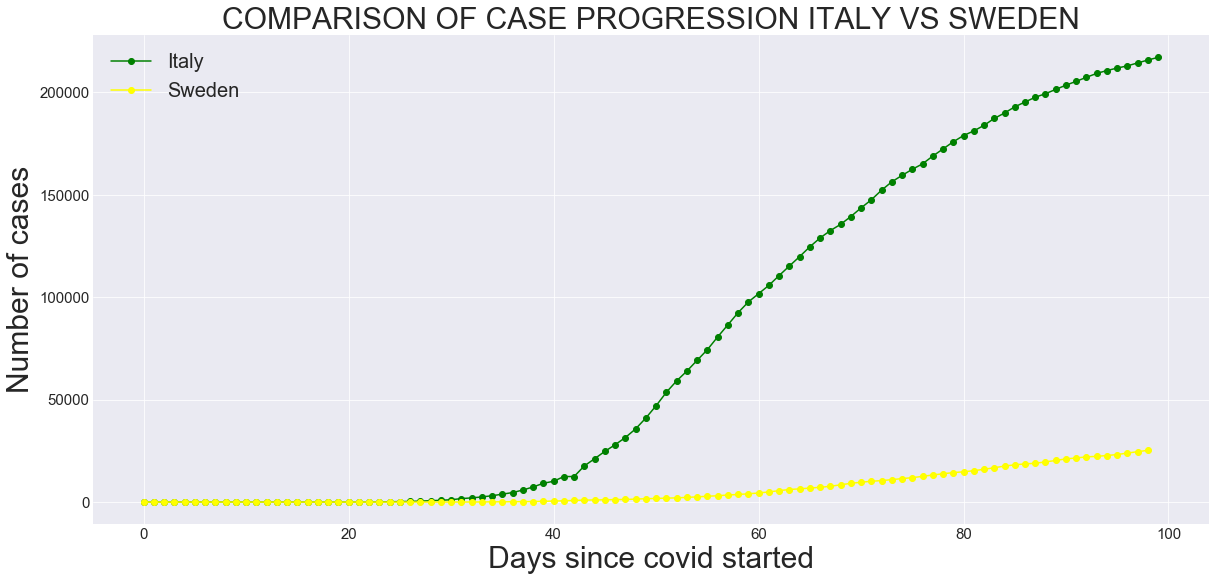

In [36]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, marker='o', color='green')
plt.plot(dias_suecia, casos_suecia, marker='o', color='yellow')


plt.title('COMPARISON OF CASE PROGRESSION ITALY VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


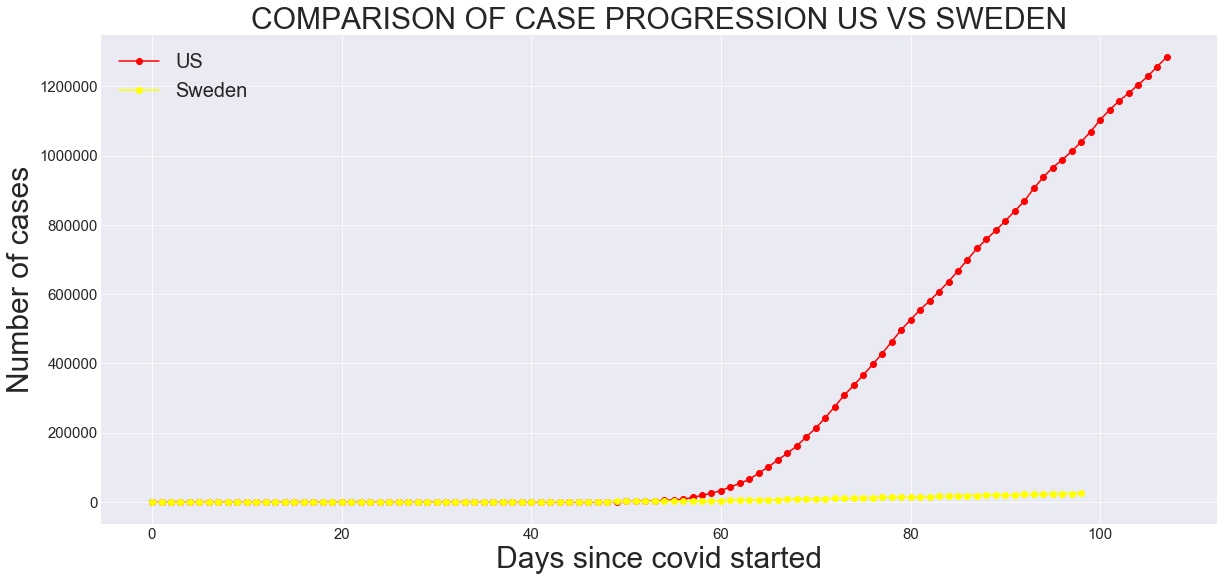

In [37]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, casos_eua, marker='o', color='red')
plt.plot(dias_suecia, casos_suecia, marker='o', color='yellow')


plt.title('COMPARISON OF CASE PROGRESSION US VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['US', 'Sweden'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


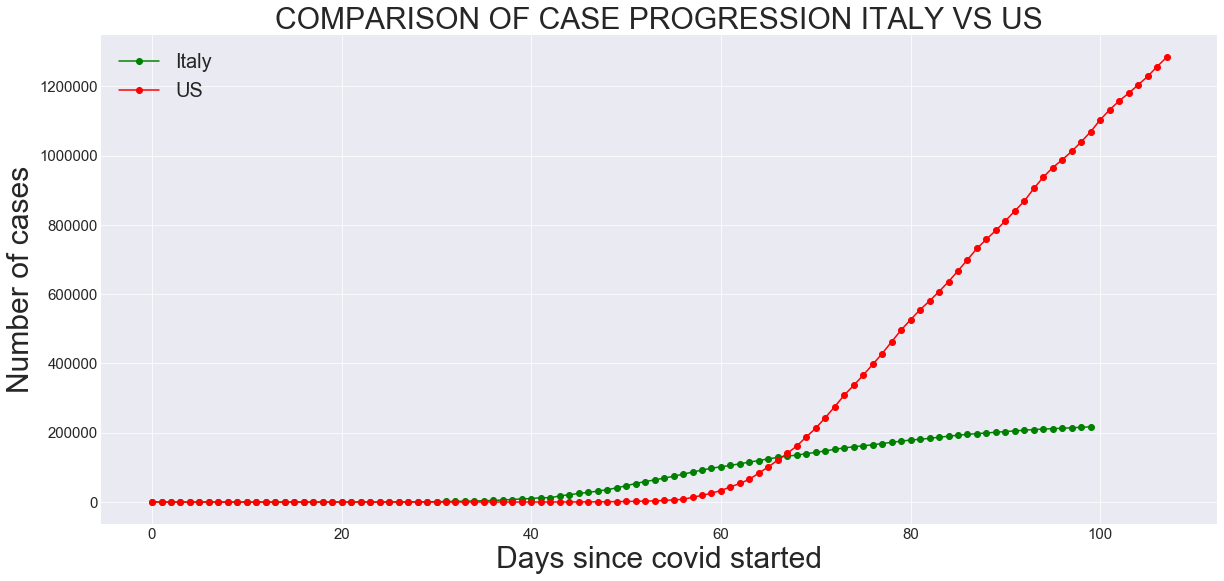

In [38]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, marker='o', color='green')
plt.plot(dias_eua, casos_eua, marker='o', color='red')


plt.title('COMPARISON OF CASE PROGRESSION ITALY VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Italy', 'US'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


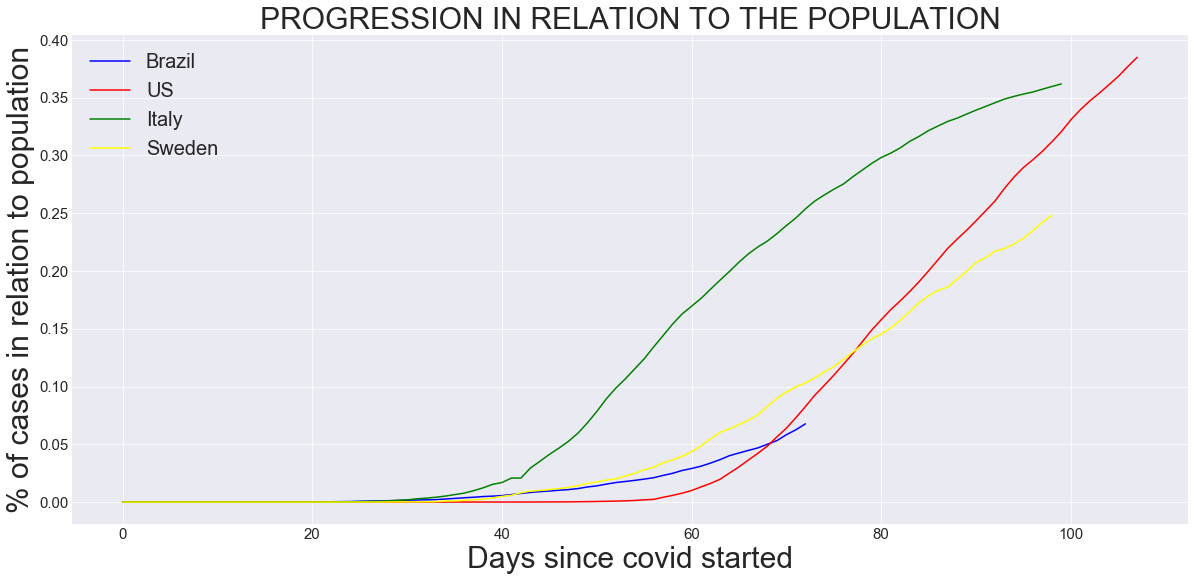

In [39]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in casos_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in casos_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in casos_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in casos_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSION IN RELATION TO THE POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of cases in relation to population', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


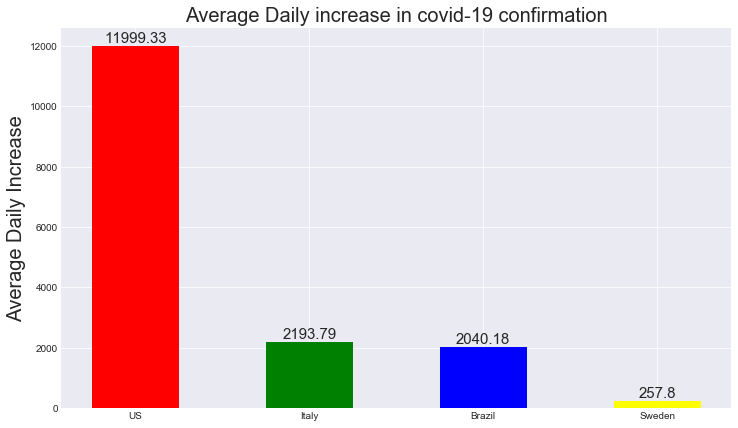

In [41]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(casos_eua)))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(casos_italia)))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(casos_brasil)))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(casos_suecia)))
next(conf_su2)
difference_us =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
difference_italy =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
difference_brazil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
difference_sweden =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]
difference_us_mean = np.array(difference_us).mean()
difference_italy_mean  = np.array(difference_italy).mean()
difference_brazil_mean = np.array(difference_brazil).mean()
difference_sweden_mean = np.array(difference_sweden).mean()


country = ['US', 'Italy', 'Brazil', 'Sweden']
numbers = [difference_us_mean, difference_italy_mean, difference_brazil_mean, difference_sweden_mean]
numbers = [round(m, 2) for m in numbers]
fig = plt.figure(figsize=(12, 7))
rects = plt.bar(country, numbers, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)
ax = rects.patches

for rect, label in zip(ax, numbers):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Average Daily Increase', size = 20)
plt.title('Average Daily increase in covid-19 confirmation', size=20)
plt.show()

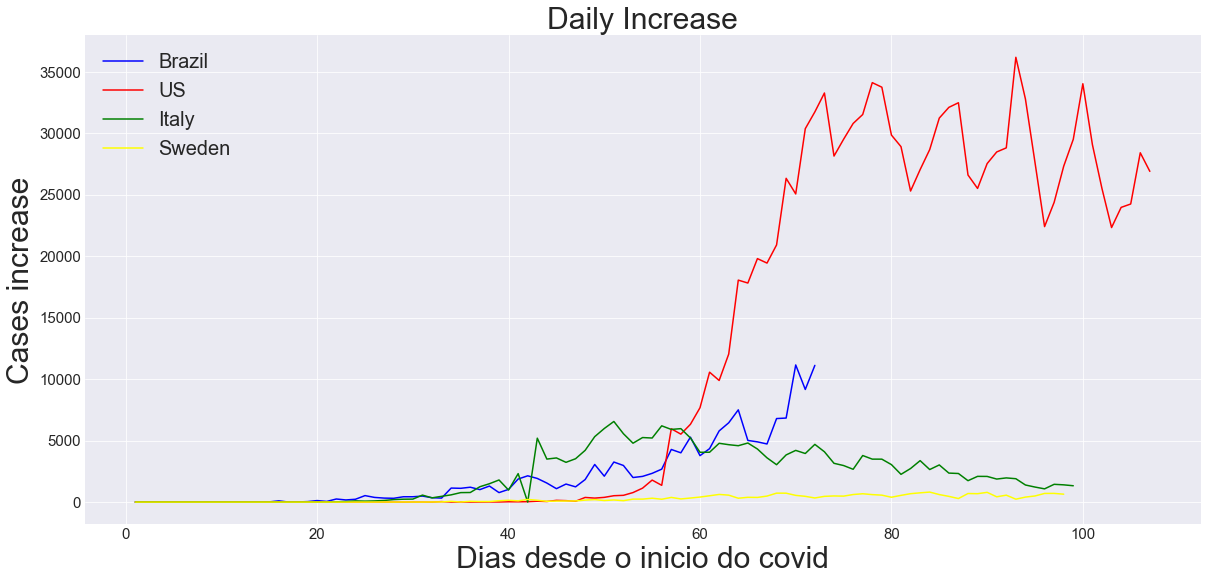

In [42]:
ax = plt.figure(figsize=(20, 9))
plt.plot(dias_brasil[1:], difference_brazil, color='blue')
plt.plot(dias_eua[1:], difference_us, color='red')
plt.plot(dias_italia[1:], difference_italy, color='green')
plt.plot(dias_suecia[1:], difference_sweden, color='yellow')

plt.title('Daily Increase', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Cases increase', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")
plt.xticks(size=15)

plt.yticks(size=15)
plt.show()

In [0]:
diferenca_eua =[int(r) - int(p) for p,r in zip(casos_eua, mortes_eua)]
diferenca_italia =[int(r) - int(p) for p,r in zip(casos_italia, mortes_italia)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(casos_brasil, mortes_brasil)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(casos_suecia, mortes_suecia)]

diferenca_eua =[int(r) - int(p) for p,r in zip(diferenca_eua, recuperados_eua)]
diferenca_italia =[int(r) - int(p) for p,r in zip(diferenca_italia, recuperados_italia)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(diferenca_brasil, recuperados_brasil)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(diferenca_suecia, recuperados_suecia)]

antes_30_eua = []
for index,conteudo in enumerate(diferenca_eua):
    if conteudo >= 30:
        antes_30_eua.append(index)
eua_day = [i for i in range(len(antes_30_eua))]

antes_30_br = []
for index,conteudo in enumerate(diferenca_brasil):
    if conteudo >= 30:
        antes_30_br.append(index)
br_day = [i for i in range(len(antes_30_br))]

antes_30_su = []
for index,conteudo in enumerate(diferenca_suecia):
    if conteudo >= 30:
        antes_30_su.append(index)
su_day = [i for i in range(len(antes_30_su))]

antes_30_it = []
for index,conteudo in enumerate(diferenca_italia):
    if conteudo >= 30:
        antes_30_it.append(index)
it_day = [i for i in range(len(antes_30_it))]

In [45]:
p1 = figure(plot_width=800, plot_height=550, title="Active cases (Total - (recovered + killed))",
             x_range=(0, 100))
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Days since covid start'
p1.yaxis.axis_label = 'Active cases'
p1.xaxis.minor_tick_line_width = 10



p1.line(br_day, diferenca_brasil[13:], color='#3E4CC3', 
        legend_label='Brazil', line_width=1)
p1.circle(br_day[-1], diferenca_brasil[-1], fill_color="white", size=5)

p1.line(eua_day, diferenca_eua[33:], color='#F54138', 
        legend_label='United States', line_width=1)
p1.circle(eua_day[-1], diferenca_eua[-1], fill_color="white", size=5)

p1.line(su_day, diferenca_suecia[33:], color='#DBAE23', 
        legend_label='Sweden', line_width=1)
p1.circle(su_day[-1], diferenca_suecia[-1], fill_color="white", size=5)


p1.line(it_day, diferenca_italia[23:], color='#3EC358', 
        legend_label='Italy', line_width=1)
p1.circle(it_day[-1], diferenca_italia[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

In [46]:
p1 = figure(plot_width=800, plot_height=550, title="Active cases (Total - (recovered + killed))",
             x_range=(0, 100), y_axis_type='log')
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Days since covid start'
p1.yaxis.axis_label = 'Active cases(LOG)'
p1.xaxis.minor_tick_line_width = 10



p1.line(br_day, diferenca_brasil[13:], color='#3E4CC3', 
        legend_label='Brazil', line_width=1)
p1.circle(br_day[-1], diferenca_brasil[-1], fill_color="white", size=5)

p1.line(eua_day, diferenca_eua[33:], color='#F54138', 
        legend_label='United States', line_width=1)
p1.circle(eua_day[-1], diferenca_eua[-1], fill_color="white", size=5)

p1.line(su_day, diferenca_suecia[33:], color='#DBAE23', 
        legend_label='Sweden', line_width=1)
p1.circle(su_day[-1], diferenca_suecia[-1], fill_color="white", size=5)


p1.line(it_day, diferenca_italia[23:], color='#3EC358', 
        legend_label='Italy', line_width=1)
p1.circle(it_day[-1], diferenca_italia[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...


** WHAT CAN BE REPAIRED THROUGH THESE CASE GRAPHICS: **
* Italy is moving towards stabilization
* United States Party for stabilization
* Brazil as well as Sweden, tend to have more percentage cases than the United States
* Brazil is going to be the country with more cases
* Italy grew by a very large percentage
* Despite the flattening, Italy has a very large average of daily cases

## Deaths

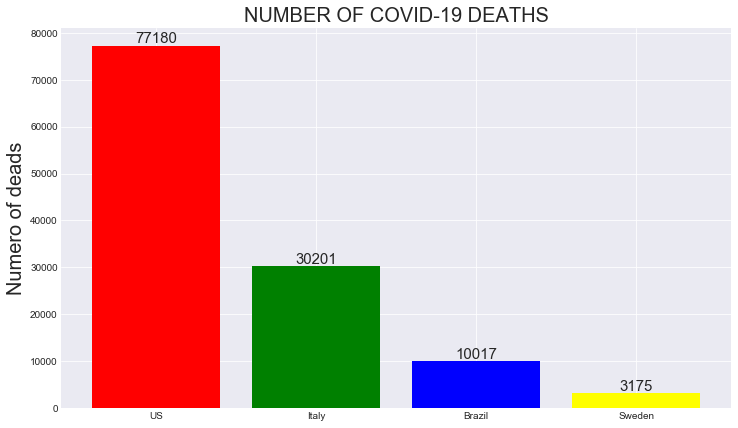

In [47]:
fig = plt.figure(figsize=(12, 7))
country = ['US', 'Italy', 'Brazil', 'Sweden']
numbers = [mortos_eua,mortos_italia,mortos_brasil, mortos_suecia]
rects = plt.bar(country,numbers, align='center', color=['red', 'green', 'blue', 'yellow'])
ax = rects.patches
for rect, label in zip(ax, numbers):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom', fontsize=15)

plt.ylabel('Numero of deads', size = 20)
plt.title('NUMBER OF COVID-19 DEATHS', size=20)
plt.show()

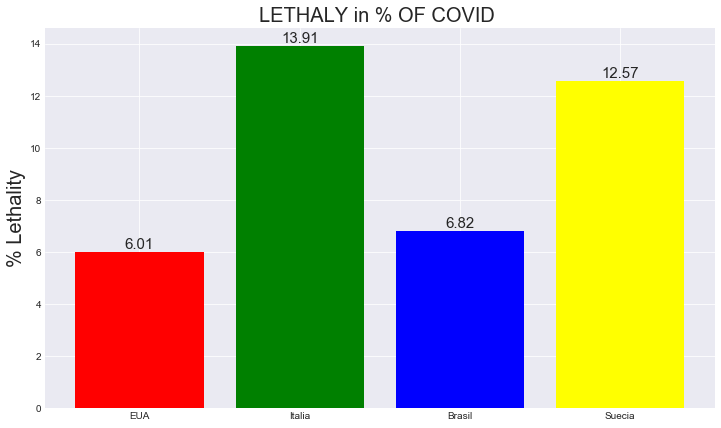

In [48]:
fig = plt.figure(figsize=(12, 7))
country = ['EUA', 'Italia', 'Brasil', 'Suecia']
numbers = [(mortos_eua/confirmados_eua)*100, (mortos_italia/confirmados_italia) *100, 
           (mortos_brasil/confirmados_brasil)*100, (mortos_suecia/confirmados_suecia)*100]
numbers = [round(num, 2) for num in numbers]
rects = plt.bar(country,numbers, align='center', color=['red', 'green', 'blue', 'yellow'])

ax = rects.patches
for rect, label in zip(ax, numbers):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('% Lethality', size = 20)
plt.title('LETHALY in % OF COVID ', size=20)
plt.show()

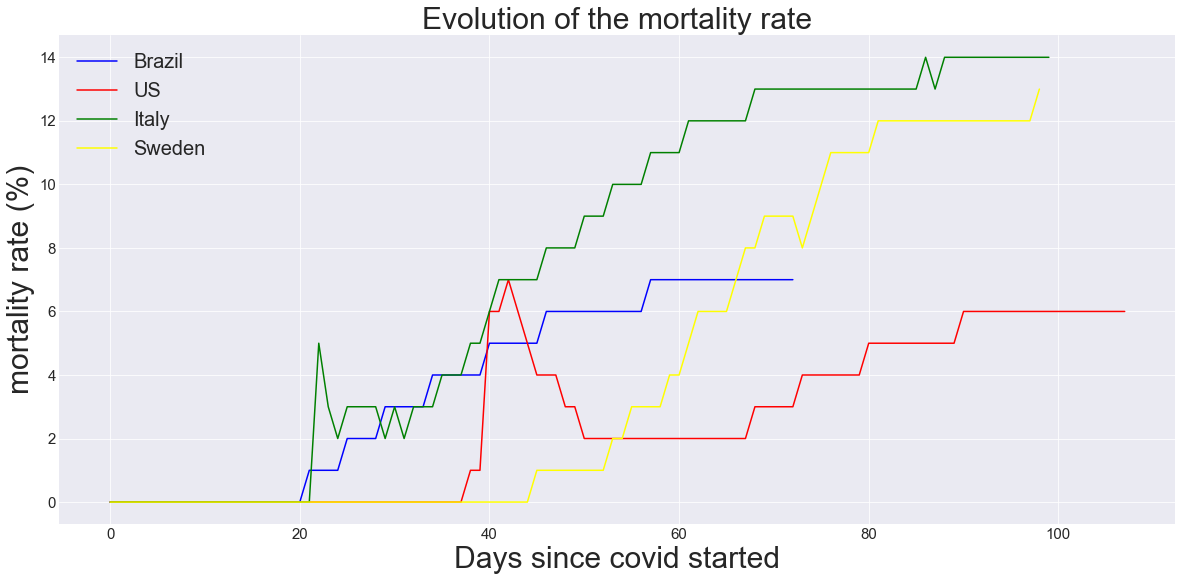

In [50]:
plt.figure(figsize=(20, 9))
mort_br = [round(abs((float(p) / float(r))), 2)*100 if p != 0 and r != 0 else 0 for p,r in zip(mortes_brasil, casos_brasil)]
mort_eua = [round(abs((float(p) / float(r))), 2)*100 if p != 0 and r != 0 else 0 for p,r in zip(mortes_eua, casos_eua)]
mort_it = [round(abs((float(p) / float(r))), 2)*100 if p != 0 and r != 0 else 0 for p,r in zip(mortes_italia, casos_italia)]
mort_su = [round(abs((float(p) / float(r))), 2)*100 if p != 0 and r != 0 else 0 for p,r in zip(mortes_suecia, casos_suecia)]


plt.plot(dias_brasil, mort_br, color='blue')
plt.plot(dias_eua, mort_eua, color='red')
plt.plot(dias_italia, mort_it, color='green')
plt.plot(dias_suecia, mort_su, color='yellow')


plt.title('Evolution of the mortality rate', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('mortality rate (%)', size = 30)
plt.legend(['Brazil', 'US','Italy','Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [51]:
print('death comparasion:')
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2201203" data-url="https://flo.uri.sh/visualisation/2201203/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

death comparasion:


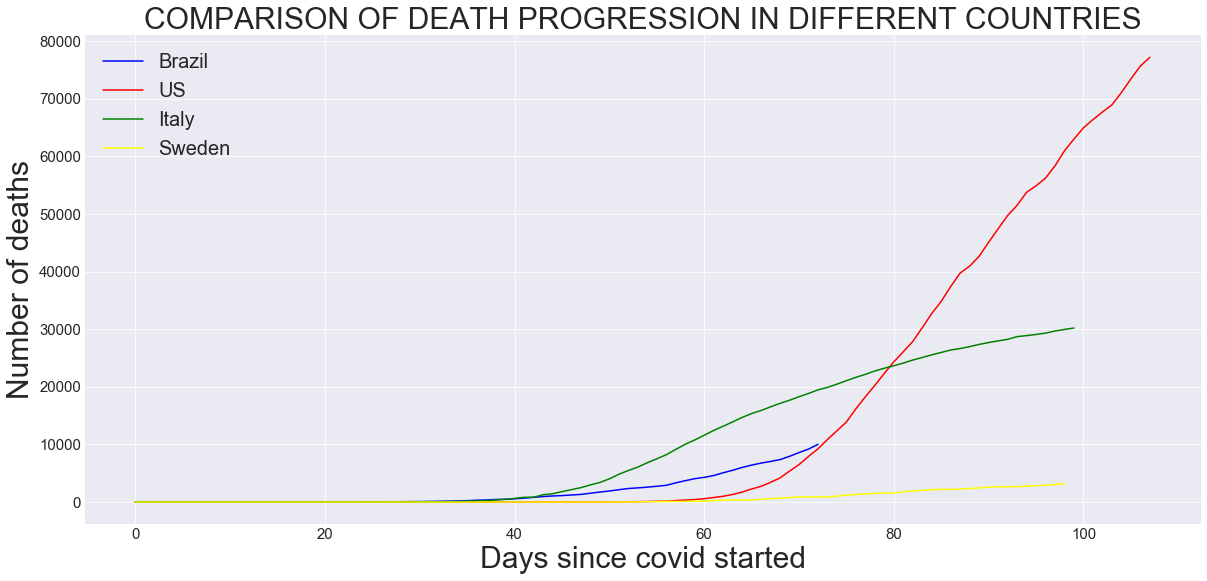

In [52]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil,color='blue')
plt.plot(dias_eua, mortes_eua, color='red')
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='yellow')

plt.title('COMPARISON OF DEATH PROGRESSION IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['Brazil', 'US', 'Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(mortes_eua)))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(mortes_eua)))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(mortes_brasil)))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(mortes_suecia)))
next(conf_su2)

diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]



antes_5_eua = []
for index,conteudo in enumerate(diferenca_eua):
    if conteudo >= 5:
        antes_5_eua.append(index)
eua_day = [i for i in range(len(antes_5_eua))]

antes_5_br = []
for index,conteudo in enumerate(diferenca_brasil):
    if conteudo >= 5:
        antes_5_br.append(index)
br_day = [i for i in range(len(antes_5_br))]

antes_5_su = []
for index,conteudo in enumerate(diferenca_suecia):
    if conteudo >= 5:
        antes_5_su.append(index)
su_day = [i for i in range(len(antes_5_su))]

antes_5_it = []
for index,conteudo in enumerate(diferenca_italia):
    if conteudo >= 5:
        antes_5_it.append(index)
it_day = [i for i in range(len(antes_5_it))]



In [54]:
p1 = figure(plot_width=800, plot_height=550, title="Death trajectory of covid-19 logarithmic",
             x_range=(0, 100), y_axis_type="log")
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Days after an increase of 5 daily deaths'
p1.yaxis.axis_label = 'Progression deaths (logarithmic scale)'
p1.xaxis.minor_tick_line_width = 0


p1.line(br_day, mortes_brasil[24:], color='#3E4CC3', 
        legend_label='Brazil', line_width=1)
p1.circle(br_day[-1], mortes_brasil[-1], fill_color="white", size=5)

p1.line(eua_day, mortes_eua[47:], color='#F54138', 
        legend_label='United States', line_width=1)
p1.circle(eua_day[-1], mortes_eua[-1], fill_color="white", size=5)

p1.line(su_day, mortes_suecia[54:], color='#DBAE23', 
        legend_label='Sweden', line_width=1)
p1.circle(su_day[-1], mortes_suecia[-1], fill_color="white", size=5)


p1.line(it_day, mortes_italia[39:], color='#3EC358', 
        legend_label='Italia', line_width=1)
p1.circle(it_day[-1], mortes_italia[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

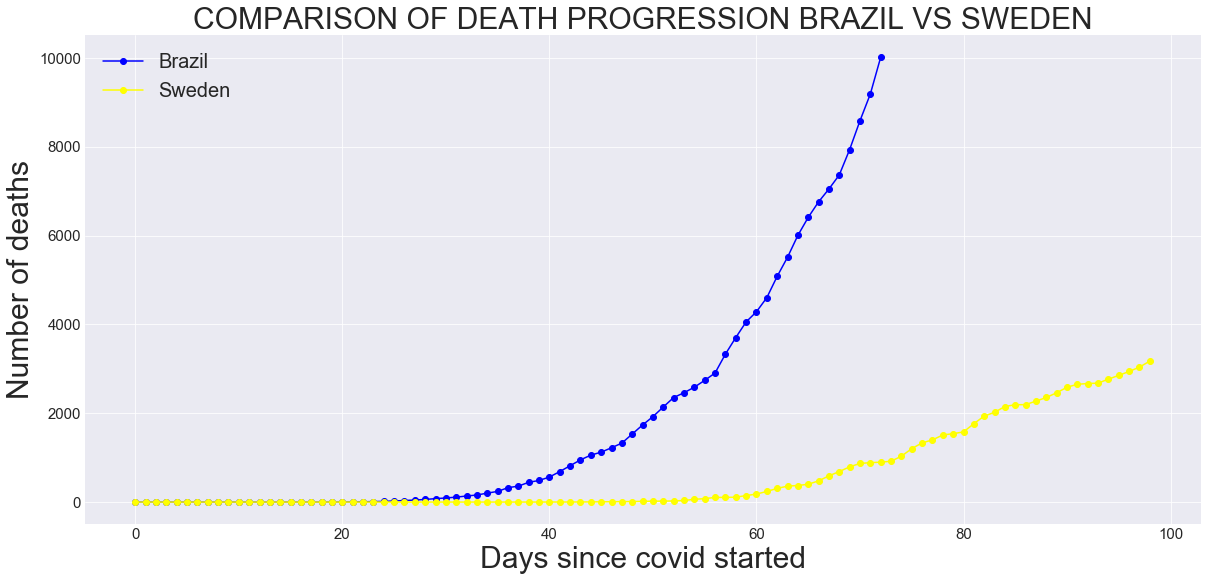

In [55]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, marker='o',  color='blue')
plt.plot(dias_suecia, mortes_suecia, marker='o',  color='yellow')


plt.title('COMPARISON OF DEATH PROGRESSION BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


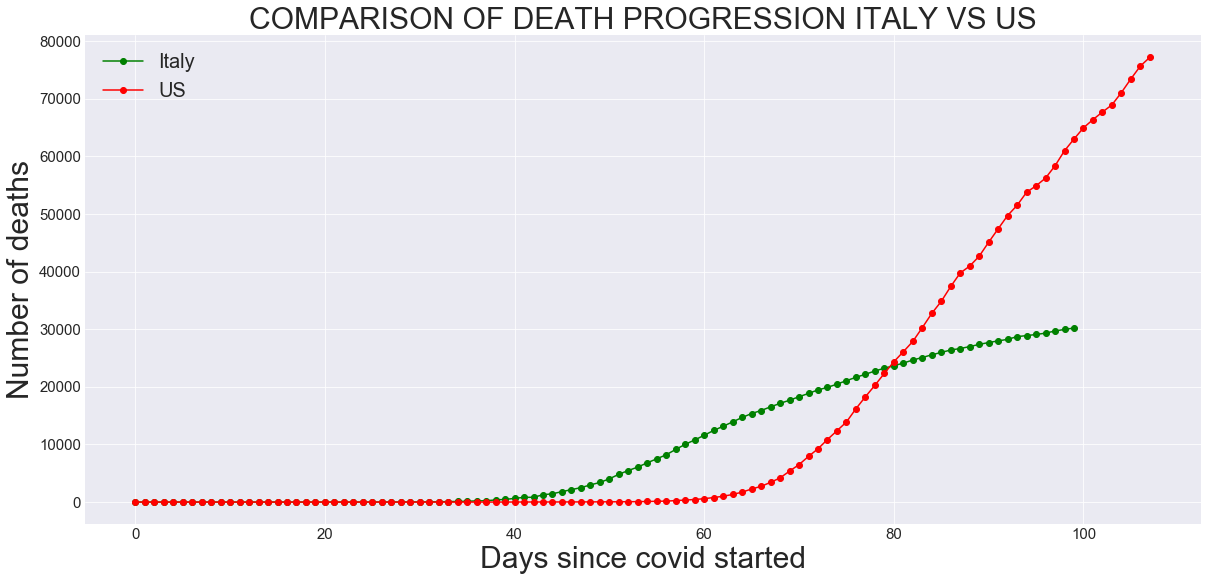

In [56]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, mortes_italia, marker='o',  color='green')
plt.plot(dias_eua, mortes_eua, marker='o',  color='red')

plt.title('COMPARISON OF DEATH PROGRESSION ITALY VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['Italy', 'US'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


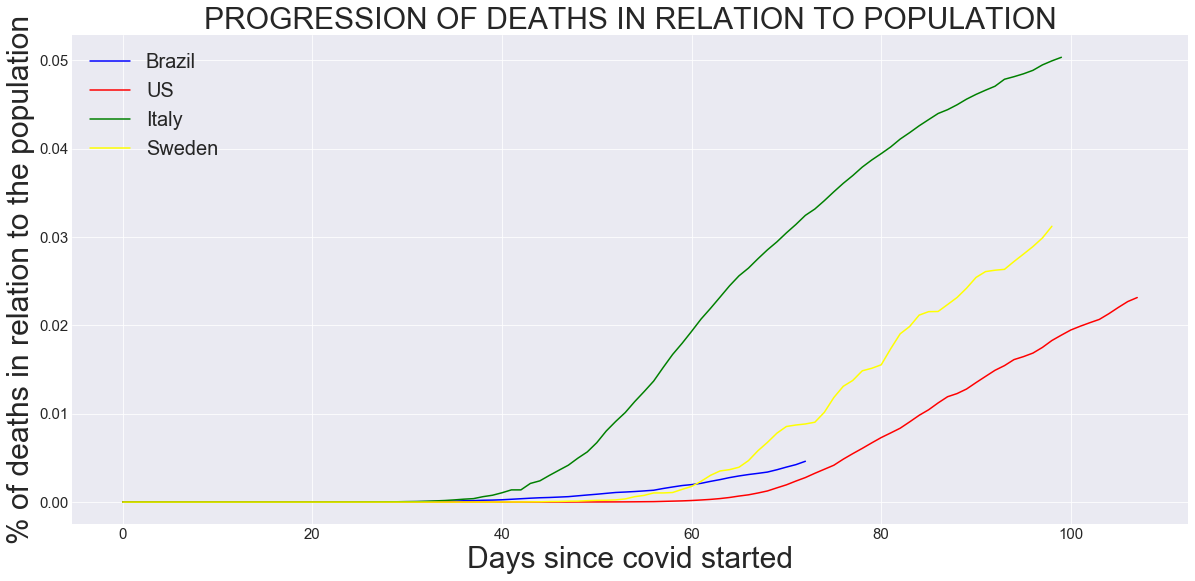

In [57]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in mortes_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSION OF DEATHS IN RELATION TO POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of deaths in relation to the population', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


When we see deaths in relation to% of population, we notice some things


* Italy is still fired up front with more numbers of deaths
* Sweden comes in front of Brazil and the USA
* Brazil is growing faster than the USA and Sweden
* Sweden and USA are on their growth curve

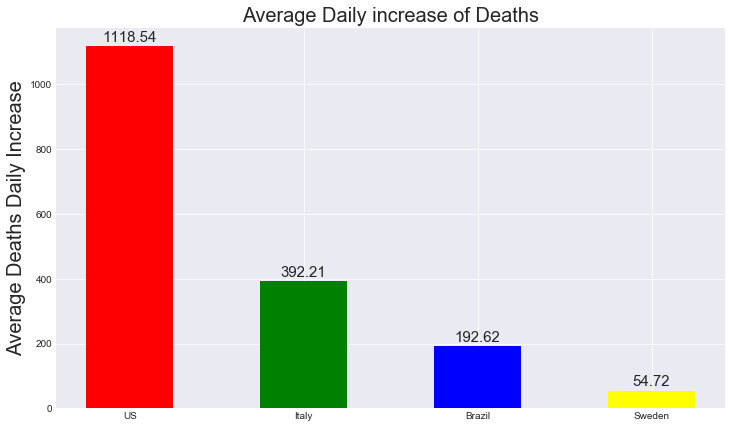

In [60]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(mortes_eua[38:])))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(mortes_italia[22:])))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(mortes_brasil[20:])))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(mortes_suecia[40:])))
next(conf_su2)
difference_us =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
difference_italy =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
difference_brazil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
difference_sweden =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]
difference_us_mean = np.array(difference_us).mean()
difference_italy_mean = np.array(difference_italy).mean()
difference_brazil_mean = np.array(difference_brazil).mean()
difference_sweden_mean = np.array(difference_sweden).mean()

country = ['US', 'Italy', 'Brazil', 'Sweden']
numbers = [difference_us_mean, difference_italy_mean, difference_brazil_mean, difference_sweden_mean]
numbers = [round(m, 2) for m in numbers]
fig = plt.figure(figsize=(12, 7))
rects = plt.bar(country, numbers, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)
ax = rects.patches

for rect, label in zip(ax, numbers):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Average Deaths Daily Increase', size = 20)
plt.title('Average Daily increase of Deaths', size=20)
plt.show()

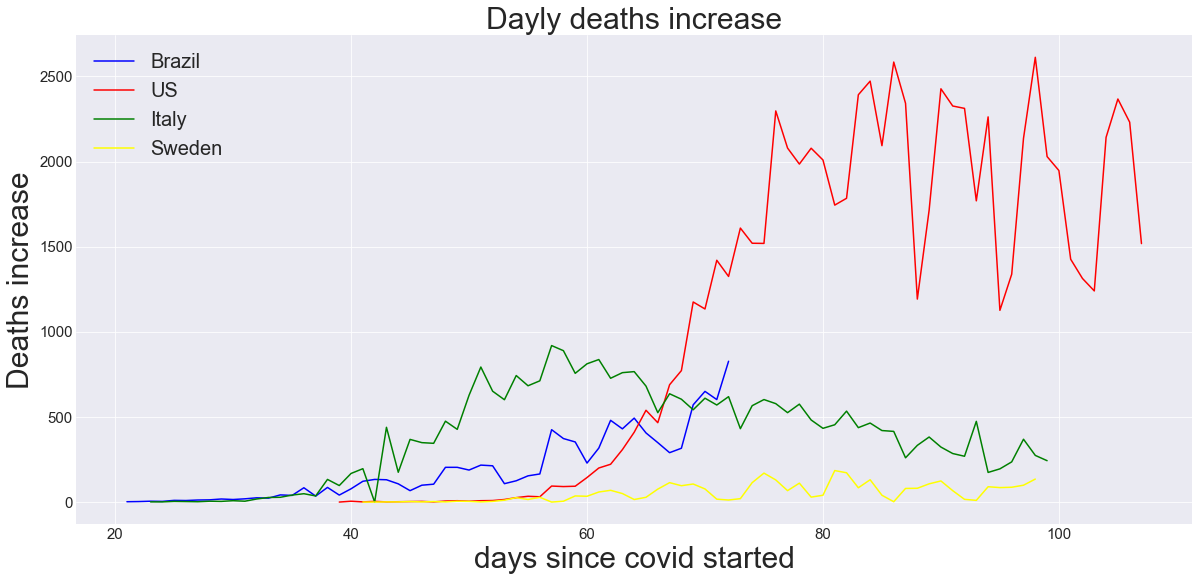

In [62]:
ax = plt.figure(figsize=(20, 9))
plt.plot(dias_brasil[21:], difference_brazil, color='blue')
plt.plot(dias_eua[39:], difference_us, color='red')
plt.plot(dias_italia[23:], difference_italy, color='green')
plt.plot(dias_suecia[41:], difference_sweden, color='yellow')

plt.title('Dayly deaths increase', size=30)
plt.xlabel('days since covid started', size = 30)
plt.ylabel('Deaths increase', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")
plt.xticks(size=15)

plt.yticks(size=15)
plt.show()

### Are we bending the curve?

In [0]:
#@markdown Very large code, two clicks to open it
#@markdown ---
conf_eua1, conf_eua2 = itertools.tee(iter(mortes_eua))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(mortes_italia))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(mortes_brasil))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(mortes_suecia))
next(conf_su2)

diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1,
                                            conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1
                                              ,conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1,
                                              conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1,
                                              conf_su2)]

depois_5_eua = []
for index,conteudo in enumerate(diferenca_eua):
    if conteudo >= 5:
        depois_5_eua.append(index)
eua_day = [i for i in range(len(depois_5_eua))]

depois_5_br = []
for index,conteudo in enumerate(diferenca_brasil):
    if conteudo >= 5:
        depois_5_br.append(index)
br_day = [i for i in range(len(depois_5_br))]

depois_5_su = []
for index,conteudo in enumerate(diferenca_suecia):
    if conteudo >= 5:
        depois_5_su.append(index)
su_day = [i for i in range(len(depois_5_su))]

depois_5_it = []
for index,conteudo in enumerate(diferenca_italia):
    if conteudo >= 5:
        depois_5_it.append(index)
it_day = [i for i in range(len(depois_5_it))]

def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
moving_eua = moving_average(diferenca_eua[47:])
moving_br = moving_average(diferenca_brasil[24:])
moving_it = moving_average(diferenca_italia[29:])
moving_su = moving_average(diferenca_suecia[52:])

In [66]:
p1 = figure(plot_width=800, plot_height=550, title="Deaths trajectory(LOG)",
             x_range=(0, 100), y_axis_type="log")
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Days since 5 death daly increase'
p1.yaxis.axis_label = 'Deaths'
p1.xaxis.minor_tick_line_width = 10



p1.line(br_day[7:], moving_br, color='#3E4CC3', 
        legend_label='Brazil', line_width=1)
p1.circle(br_day[-1], moving_br[-1], fill_color="white", size=5)

p1.line(eua_day[7:], moving_eua, color='#F54138', 
        legend_label='United States', line_width=1)
p1.circle(eua_day[-1], moving_eua[-1], fill_color="white", size=5)

p1.line(su_day[5:], moving_su, color='#DBAE23', 
        legend_label='Sweden', line_width=1)
p1.circle(su_day[-1], moving_su[-1], fill_color="white", size=5)


p1.line(it_day[6:], moving_it, color='#3EC358', 
        legend_label='Italy', line_width=1)
p1.circle(it_day[-1], moving_it[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

## Deahts vs Confirmed bar chart 

In [68]:
dias = index_brasil
colunas = ["Deaths","Cases"]
colors = ["red", "blue"]

data = {'dias' : dias,
        'Deaths'   : mortes_brasil,
        'Cases'   : casos_brasil}

p1 = figure(x_range=dias, plot_width=900, plot_height=550, title="Cases vs Death Brazil",)
p1.vbar_stack(colunas, x='dias', width=0.9, color=colors, source=data,
             legend_label=colunas)
p1.legend.location = "top_left"

output_notebook()
show(p1)

Loading BokehJS ...

In [69]:
dias = index_eua
colunas = ["Deaths","Cases"]
colors = ["red", "blue"]

data = {'dias' : dias,
        'Deaths'   : mortes_eua,
        'Cases'   : casos_eua}

p1 = figure(x_range=dias, plot_width=930, plot_height=550, title="Cases vs Death US",)
p1.vbar_stack(colunas, x='dias', width=0.9, color=colors, source=data,
             legend_label=colunas)
p1.legend.location = "top_left"

output_notebook()
show(p1)

Loading BokehJS ...

In [73]:
dias = index_italia
colunas = ["Deaths","Cases"]
colors = ["red", "blue"]

data = {'dias' : dias,
        'Deaths'   : mortes_italia,
        'Cases'   : casos_italia}

p1 = figure(x_range=dias, plot_width=930, plot_height=550, title="Cases vs Death Italy",)
p1.vbar_stack(colunas, x='dias', width=0.9, color=colors, source=data,
             legend_label=colunas)
p1.legend.location = "top_left"

output_notebook()
show(p1)

Loading BokehJS ...

In [71]:
dias = index_suecia
colunas = ["Death","Cases"]
colors = ["red", "blue"]

data = {'dias' : dias,
        'Death'   : mortes_suecia,
        'Cases'   : casos_suecia}

p1 = figure(x_range=dias, plot_width=930, plot_height=550, title="Cases vs Death Sweden",)
p1.vbar_stack(colunas, x='dias', width=0.9, color=colors, source=data,
             legend_label=colunas)
p1.legend.location = "top_left"

output_notebook()
show(p1)

Loading BokehJS ...

## Deaths vs recovered

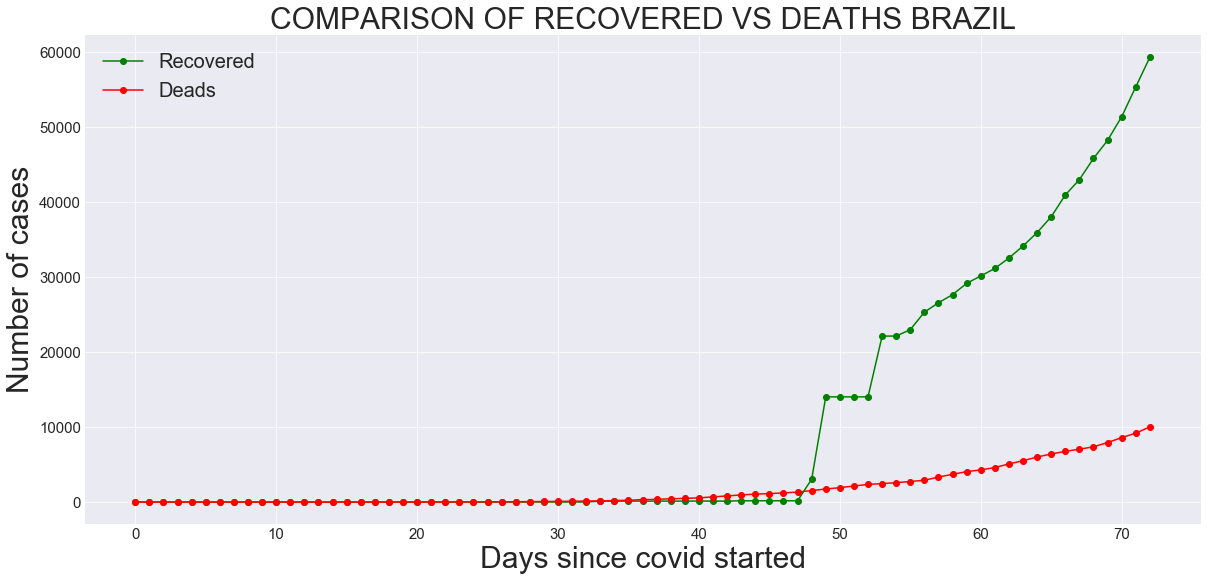

In [74]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, recuperados_brasil, marker='o',  color='green')
plt.plot(dias_brasil, mortes_brasil, marker='o',  color='red')


plt.title('COMPARISON OF RECOVERED VS DEATHS BRAZIL', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


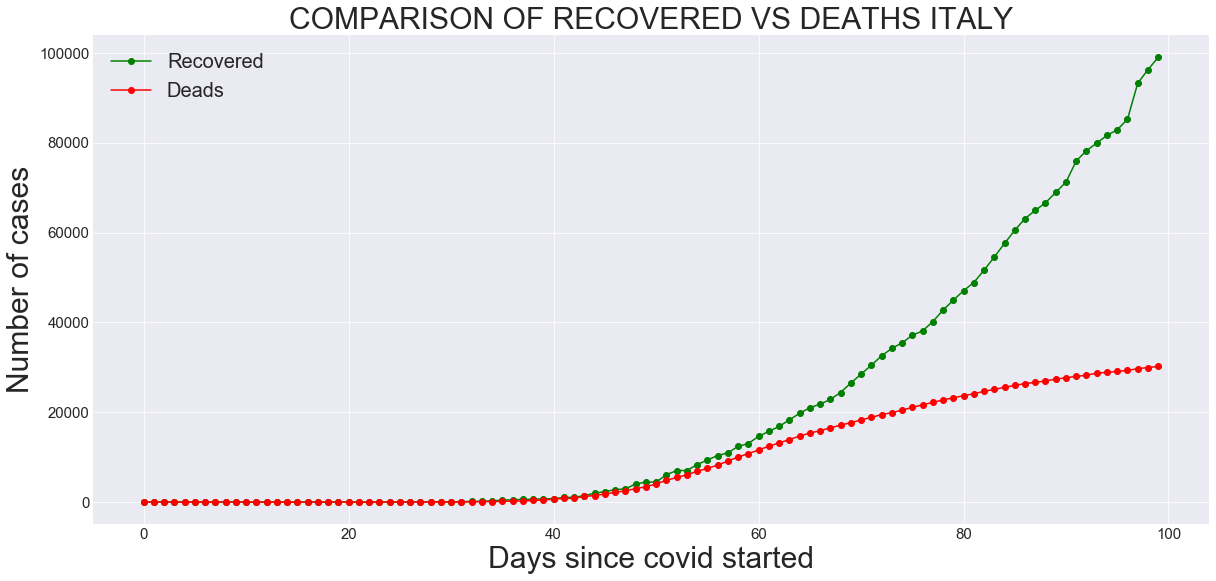

In [75]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, recuperados_italia, marker='o',  color='green')
plt.plot(dias_italia, mortes_italia, marker='o',  color='red')


plt.title('COMPARISON OF RECOVERED VS DEATHS ITALY', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


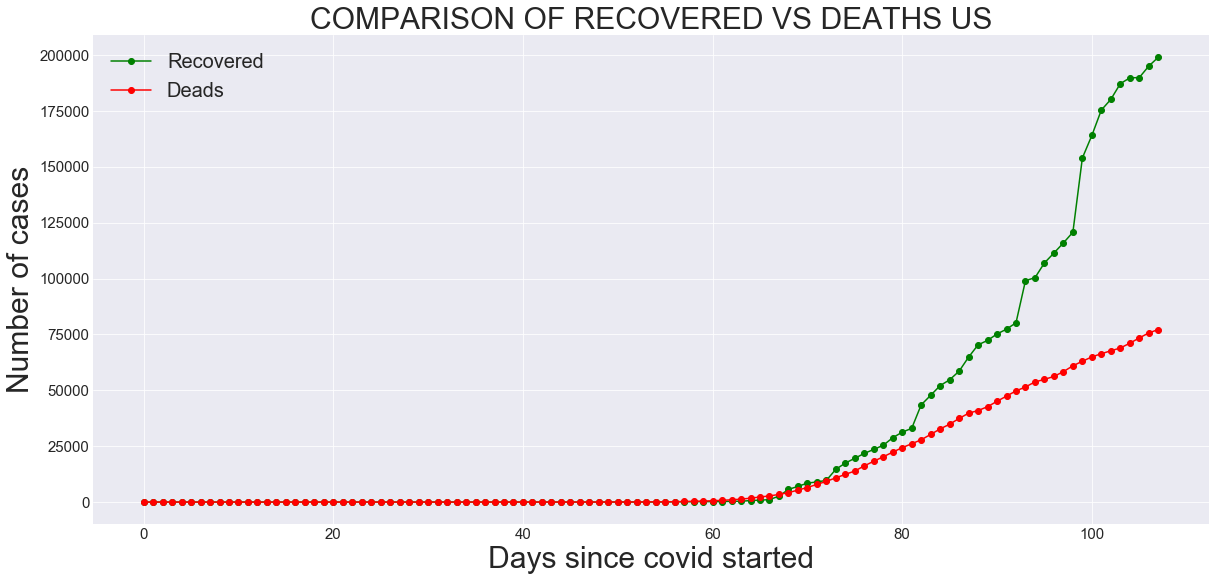

In [76]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, recuperados_eua, marker='o',  color='green')
plt.plot(dias_eua, mortes_eua, marker='o',  color='red')



plt.title('COMPARISON OF RECOVERED VS DEATHS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


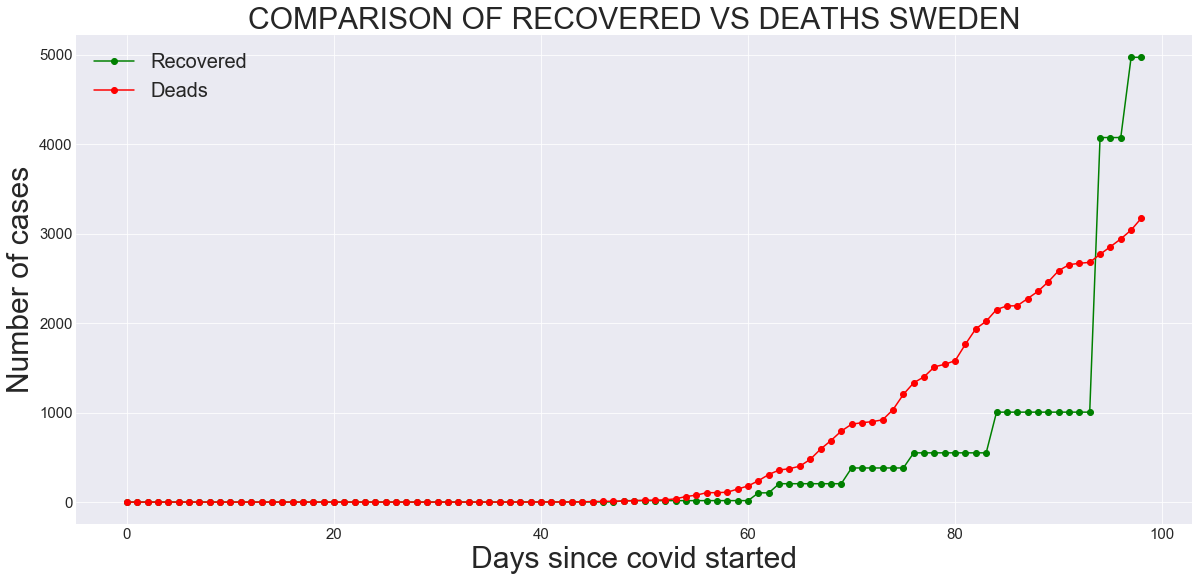

In [77]:
plt.figure(figsize=(20, 9))
plt.plot(dias_suecia, recuperados_suecia, marker='o',  color='green')
plt.plot(dias_suecia, mortes_suecia, marker='o',  color='red')



plt.title('COMPARISON OF RECOVERED VS DEATHS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['Recovered', 'Deads'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


As we can see, in the countries that have already had their growth curve more accentuated, the number of cured people exceeds the number of deaths, while in countries like Brazil and Sweden that have not yet reached this growth curve, the number of deaths is greater than the of recovered, including the number of recovered stabilizes.


# Predict

In this section we will apply sklearn's SVR algorithm to try to predict the number of deaths, cases and recoveries from the 4 countries in the next 40 days.


---

NOTE:  PREDICTS  ARE ALSO BEING OPTIMIZED IN ANOTHER FILE TO REDUCE THE ERROR

In [0]:
#separating the target (value to be forecasted) from the dates
target_confirmado_br = df_confirmados_brasil['cases'].copy()
df_confirmados_brasil.drop('cases', axis = 1, inplace= True)

target_mortos_br = df_mortes_brasil['deaths'].copy()
df_mortes_brasil.drop('deaths', axis = 1, inplace= True)

target_recuperado_br = df_recuperados_brasil['recovery']
df_recuperados_brasil.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_eua = df_confirmados_eua['cases'].copy()
df_confirmados_eua.drop('cases', axis = 1, inplace= True)

target_mortos_eua = df_mortes_eua['deaths'].copy()
df_mortes_eua.drop('deaths', axis = 1, inplace= True)

target_recuperado_eua = df_recuperados_eua['recovery']
df_recuperados_eua.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_italia = df_confirmados_italia['cases'].copy()
df_confirmados_italia.drop('cases', axis = 1, inplace= True)

target_mortos_italia = df_mortes_italia['deaths'].copy()
df_mortes_italia.drop('deaths', axis = 1, inplace= True)

target_recuperado_italia = df_recuperados_italia['recovery']
df_recuperados_italia.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_suecia = df_confirmados_suecia['cases'].copy()
df_confirmados_suecia.drop('cases', axis = 1, inplace= True)

target_mortos_suecia = df_mortes_suecia['deaths'].copy()
df_mortes_suecia.drop('deaths', axis = 1, inplace= True)

target_recuperado_suecia = df_recuperados_suecia['recovery']
df_recuperados_suecia.drop('recovery', axis = 1, inplace= True)

In [0]:
# Start from Brazil

In [79]:
#Casos Brasil
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_brasil, target_confirmado_br, test_size=0.1, random_state=42)
poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(X_train)
svm = LinearRegression()
print("fitting..")
svm.fit(X_poly,y_train)

fitting..


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred_caso_br = svm.predict(poly.fit_transform(futuro_brasil))

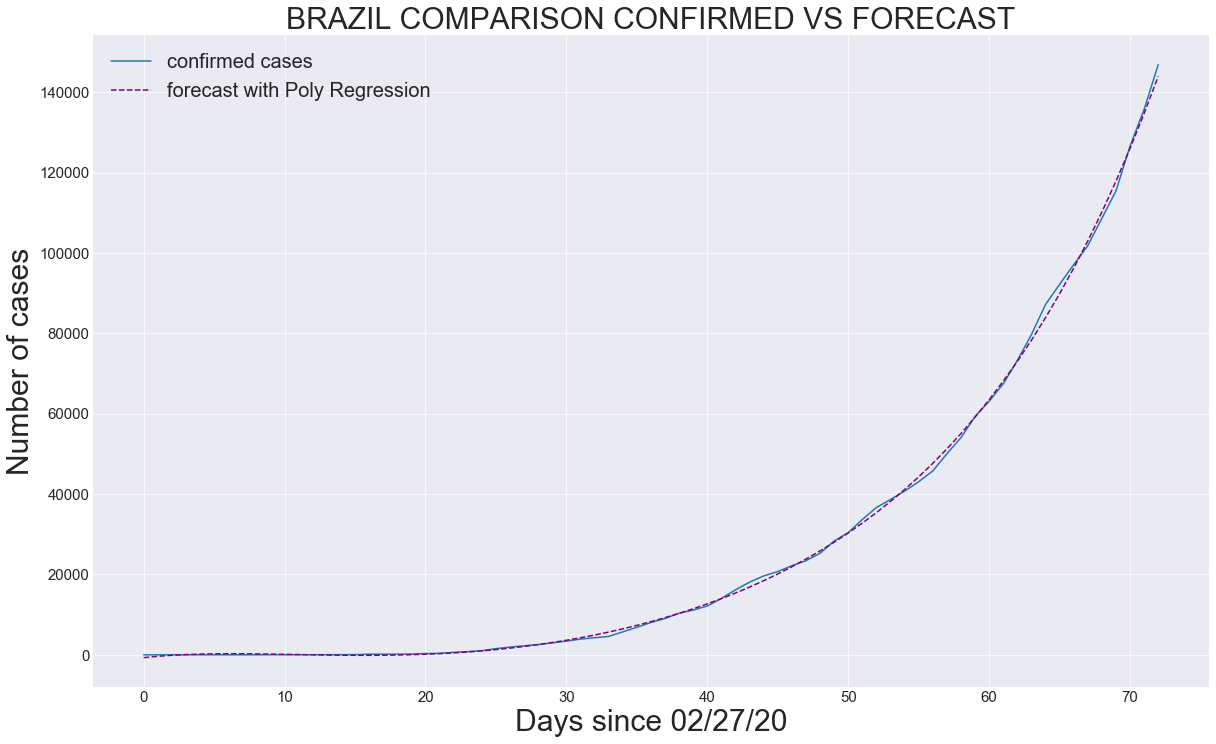

In [81]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, casos_brasil)
plt.plot(futuro_brasil[0:len(dias_brasil)],pred_caso_br[0:len(casos_brasil)], linestyle = 'dashed', color='purple')
plt.title('BRAZIL COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since 02/27/20', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with Poly Regression'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [82]:
# predicao mortes brasil
X_train, X_test, y_train, y_test = train_test_split(df_mortes_brasil, target_mortos_br, test_size=0.1, random_state=42)
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X_train)
svm = LinearRegression()
print('fitting...')
svm.fit(X_poly,y_train)

fitting...


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred_mortes_br = svm.predict(poly.fit_transform(futuro_brasil))

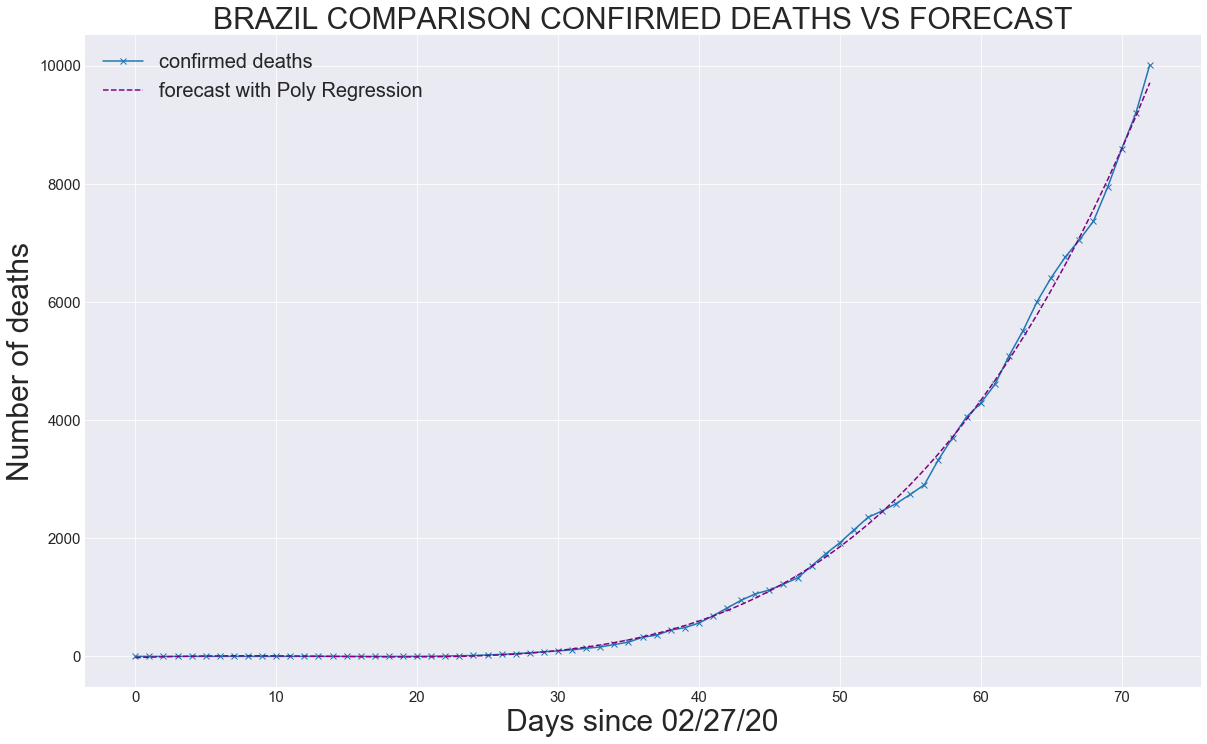

In [89]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, mortes_brasil, marker='x')
plt.plot(futuro_brasil[0:len(dias_brasil)], pred_mortes_br[0:len(mortes_brasil)], linestyle = 'dashed', color='purple')
plt.title('BRAZIL COMPARISON CONFIRMED DEATHS VS FORECAST', size=30)
plt.xlabel('Days since 02/27/20', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with Poly Regression'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [86]:
#US
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=3000, shuffle=True)
print('fitting...')
mlp.fit(df_confirmados_eua, target_confirmado_eua)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=3000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_caso_eua = mlp.predict(futuro_eua)

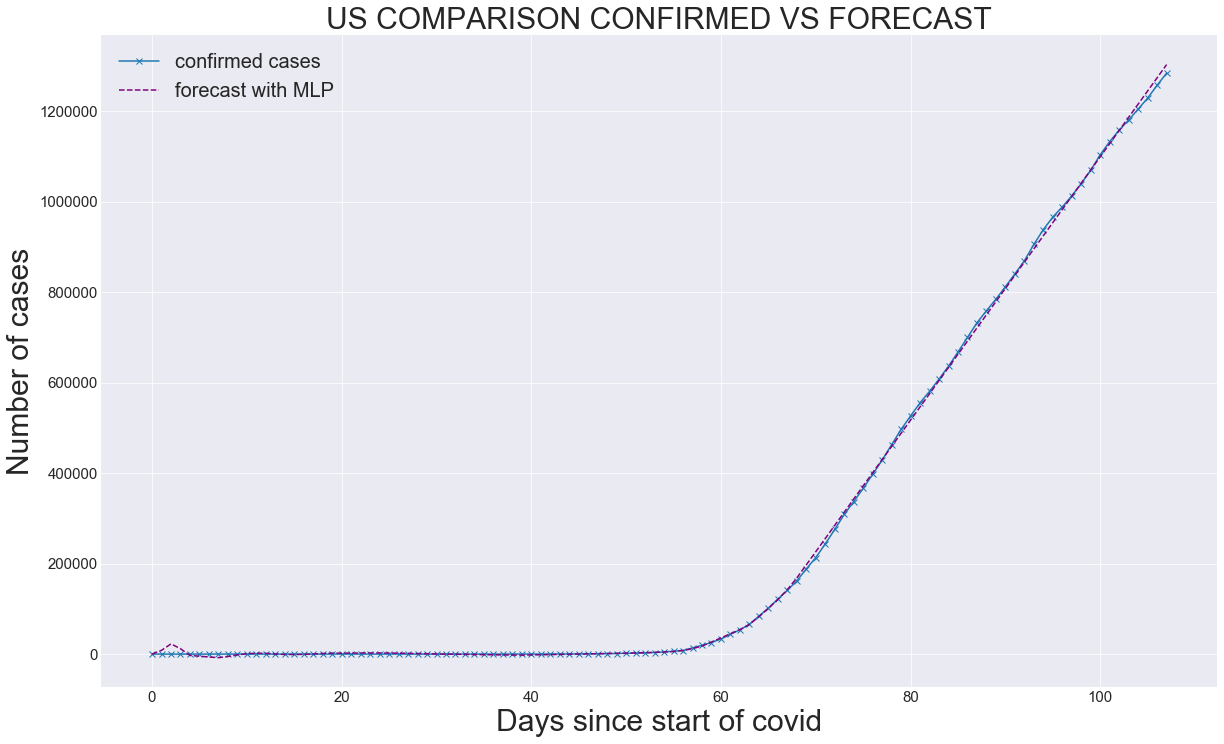

In [91]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, casos_eua, marker='x')
plt.plot(futuro_eua[0:len(dias_eua)],pred_caso_eua[0:len(casos_eua)], linestyle = 'dashed', color='purple')
plt.title('US COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with MLP'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [92]:
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=3000, shuffle=True)
print('fitting...')
mlp.fit(df_mortes_eua, target_mortos_eua)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=3000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_mortes_eua = mlp.predict(futuro_eua)

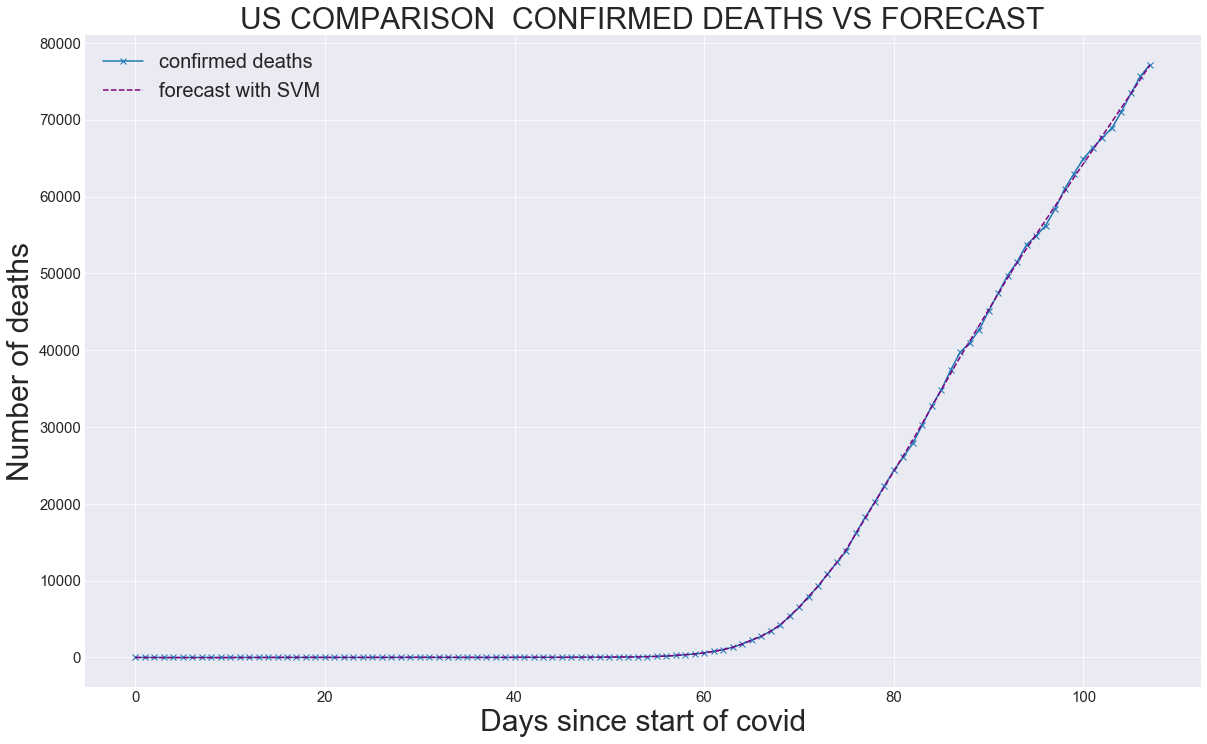

In [94]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, mortes_eua, marker = 'x')
plt.plot(futuro_eua[0:len(dias_eua)],pred_mortes_eua[0:len(mortes_eua)], linestyle = 'dashed', color='purple')
plt.title('US COMPARISON  CONFIRMED DEATHS VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with MLP'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [95]:
# Italy Predict
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=30000, shuffle=True)
print('fitting...')
mlp.fit(df_confirmados_italia, target_confirmado_italia)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=30000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_caso_italia = mlp.predict(futuro_italia)

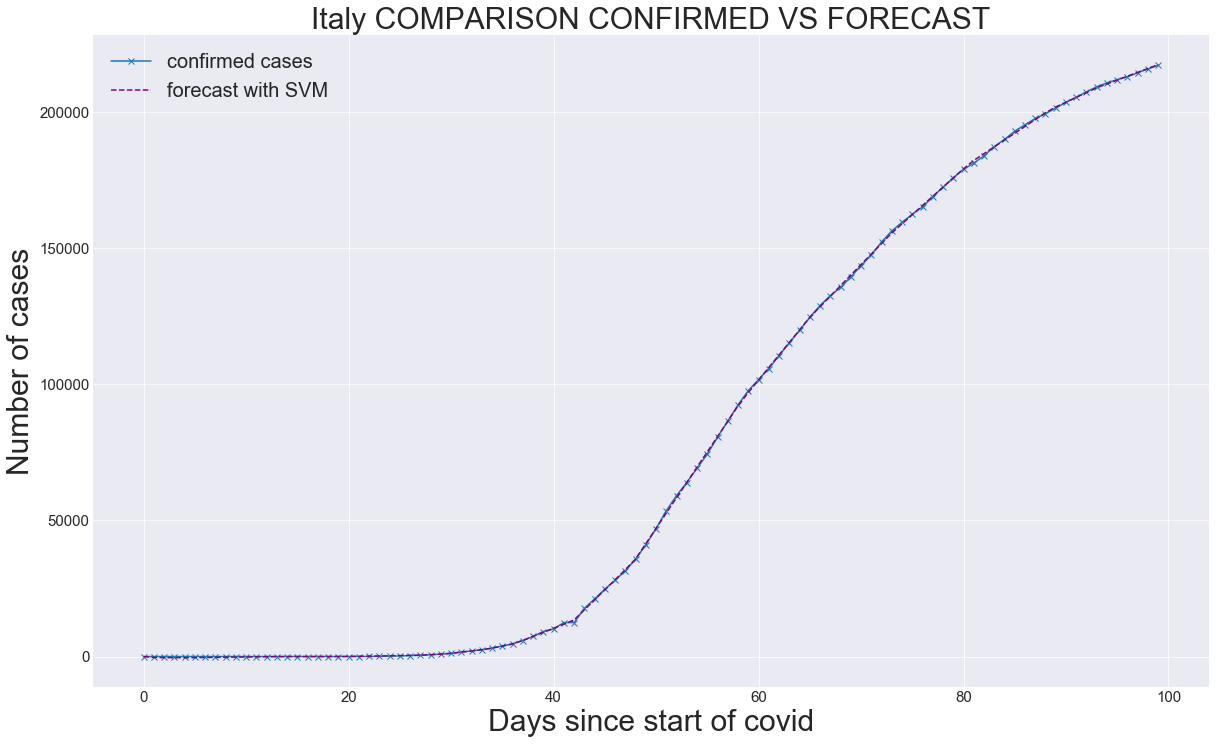

In [97]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, casos_italia, marker = 'x')
plt.plot(futuro_italia[0:len(dias_italia)],pred_caso_italia[0:len(casos_italia)], linestyle = 'dashed', color='purple')
plt.title('Italy COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [98]:
X_train, X_test, y_train, y_test = train_test_split(df_mortes_italia, target_mortos_italia, test_size=0.1, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=30000, shuffle=True)
print('fitting...')
mlp.fit(df_mortes_italia, target_mortos_italia)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=30000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_mortes_italia = mlp.predict(futuro_italia)

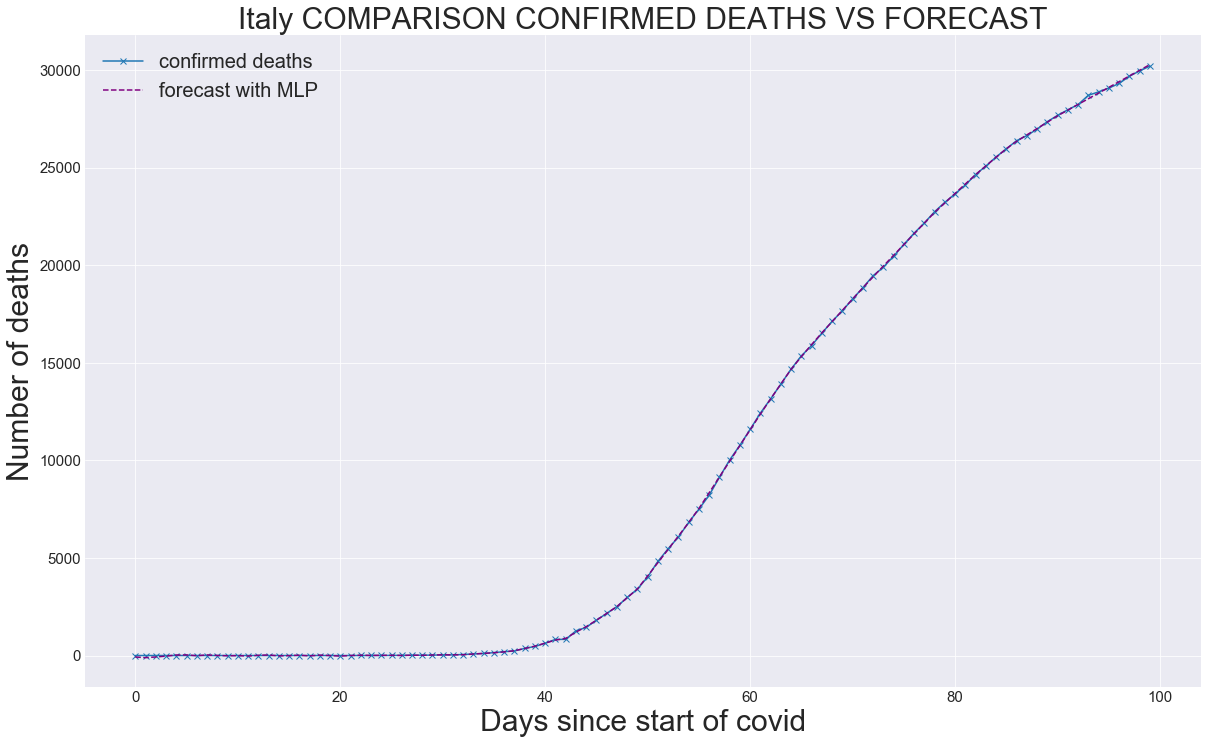

In [100]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, mortes_italia, marker='x')
plt.plot(futuro_italia[0:len(mortes_italia)],pred_mortes_italia[0:len(mortes_italia)], linestyle = 'dashed', color='purple')
plt.title('Italy COMPARISON CONFIRMED DEATHS VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with MLP'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [101]:
# Sweden predict
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=3000, shuffle=True)
print('fitting...')
mlp.fit(df_confirmados_suecia, target_confirmado_suecia)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=3000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_caso_suecia = mlp.predict(futuro_suecia)

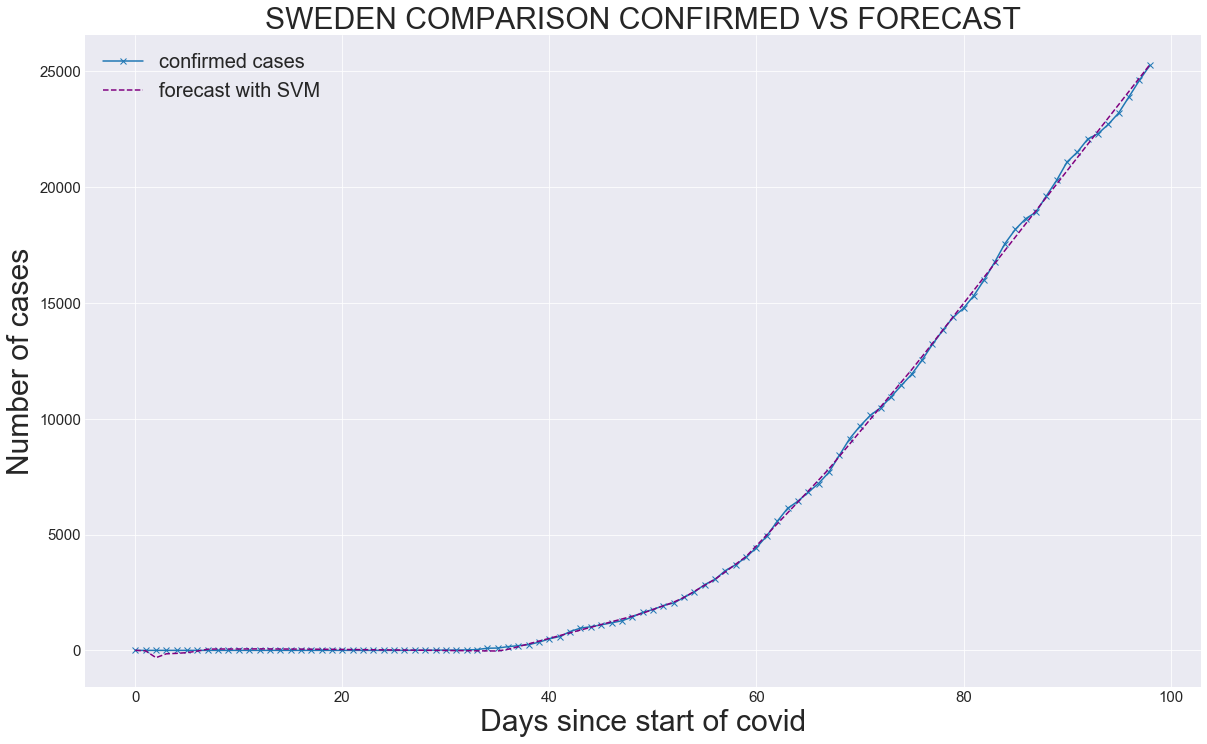

In [103]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, casos_suecia, marker='x')
plt.plot(futuro_suecia[0:len(dias_suecia)], pred_caso_suecia[0:len(casos_suecia)], linestyle = 'dashed', color='purple')
plt.title('SWEDEN COMPARISON CONFIRMED VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.legend(['confirmed cases', 'forecast with SVM'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [104]:
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=3000, shuffle=True)
print('fitting...')
mlp.fit(df_mortes_suecia, target_mortos_suecia)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=3000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_mortes_suecia = mlp.predict(futuro_suecia)

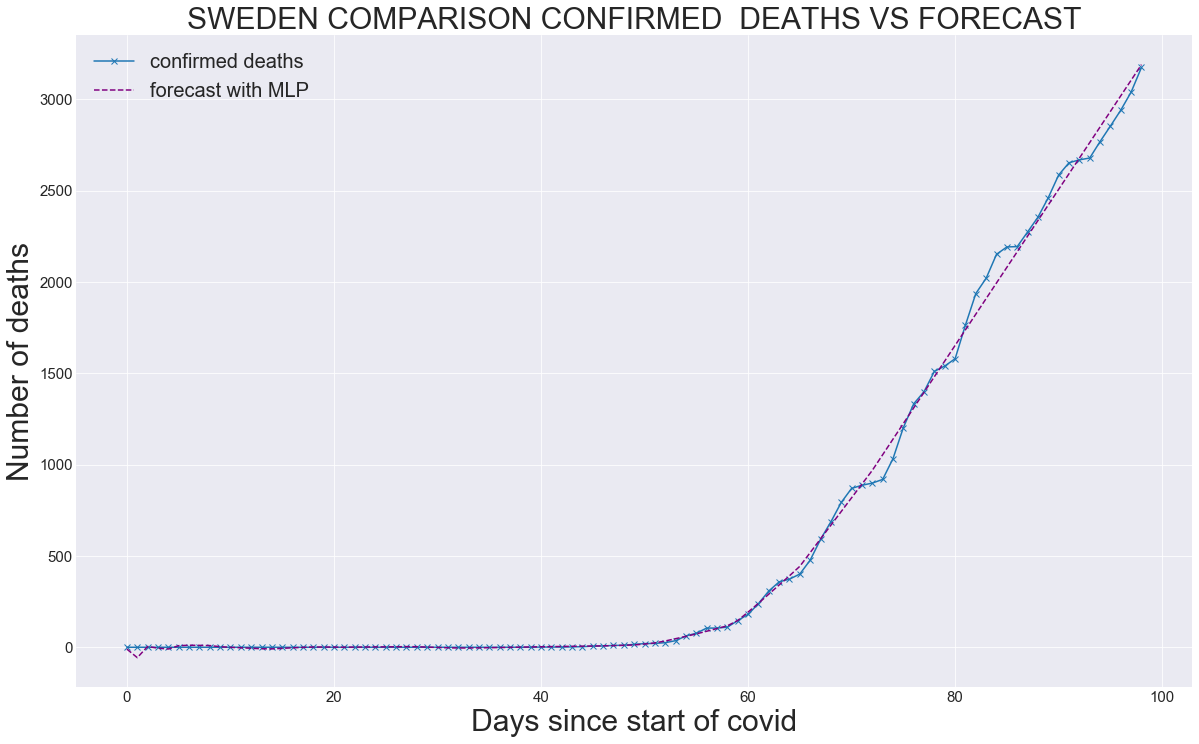

In [118]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, mortes_suecia,marker='x')
plt.plot(futuro_suecia[0:len(dias_suecia)],pred_mortes_suecia[0:len(mortes_suecia)], linestyle = 'dashed', color='purple')
plt.title('SWEDEN COMPARISON CONFIRMED  DEATHS VS FORECAST', size=30)
plt.xlabel('Days since start of covid', size = 30)
plt.ylabel('Number of deaths', size = 30)
plt.legend(['confirmed deaths', 'forecast with MLP'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# Results Presentation

In this section we will build 8 data frames, one of confirmed cases and one of deaths for each country. In these dataframes we will have the official cases and those that our program predicted, and it will be updated directly.
In addition to these dataframes, we will redo the graphics made in the graphics section, but now with the forecasts, to see if the scenario of the countries change in relation to each other

Below is the average error of our forecast for the confirmed cases  and the table with the forecasts, real cases and the difference between the two.
since these are forecasts, there are tables that have no differences yet, because our program has 40 days ahead. 

DRAG THE TABLES SCROLL BAR TO SEE ANOTHER DAYS.


---


order of tables:


1. Brazil confirmed
2. Dead Brazil
3. Confirmed USA
4. Dead USA
5. Italy confirmed
6. Dead Italy
7. Sweden confirmed
8. Dead Sweden

In [0]:
index = ['Predict', 'Real', 'Percentage difference', 'Gross difference']
pd.set_option('display.max_columns', 250)

In [0]:
columns =[i for i in datas_futuras_br]
forecast = [round(i, 0) for i in pred_caso_br]
difference =[int(p) - int(r) for p,r in zip(pred_caso_br, casos_brasil)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, casos_brasil) ]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_case_br = pd.DataFrame([forecast[40:], casos_brasil[40:], formated_percentage_difference[40:], difference[40:]],
                          columns=columns[40:], index = index)


In [121]:
difference = np.array(difference[40:])
percentage_difference = np.array(percentage_difference[40:])
print(f"The average gross error for confirmed cases in Brazil is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for confirmed cases in Brazil is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for confirmed cases in Brazil is: 1012.8
The average percentage error for confirmed cases in Brazil is: 2.14%


In [122]:
print('CONFIRMED CASES FOR BRAZIL: ')
df_case_br

CONFIRMED CASES FOR BRAZIL: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
Predict                  12687    13992    15383    16866    18447    20130   
Real                     12161    14034    16170    18092    19638    20727   
Percentage difference    4.33%   -0.31%   -4.87%   -6.78%   -6.07%   -2.89%   
Gross difference           526      -43     -787    -1226    -1192     -598   

                      04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
Predict                  21922    23830    25862    28025    30328    32781   
Real                     22192    23430    25262    28320    30425    33682   
Percentage difference   -1.22%    1.71%    2.37%   -1.05%   -0.32%   -2.68%   
Gross difference          -271      400      599     -296      -97     -902   

                      04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
Predict                  35393    38175    41138    44296    47660    51246   
Real                     36658    38654    40743    43079    45757    50036   
Percentage difference   -3.45%   -1.24%    0.97%    2.82%    4.16%    2.42%   
Gross difference         -1266     -480      395     1216     1903     1209   

                      04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
Predict                  55067    59140    63481    68108    73040    78296   
Real                     54043    59324    63100    67446    73235    79685   
Percentage difference    1.89%   -0.31%     0.6%    0.98%   -0.27%   -1.74%   
Gross difference          1024     -184      381      662     -196    -1390   

                      04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
Predict                  83896    89864    96221   102993   110203   117880   
Real                     87187    92202    97100   101826   108620   115455   
Percentage difference   -3.77%   -2.54%   -0.91%    1.15%    1.46%     2.1%   
Gross difference         -3291    -2338     -879     1166     1583     2424   

                      05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  \
Predict                 126050   134742   143987  153817.0  164265.0   
Real                    126611   135773   146894       NaN       NaN   
Percentage difference   -0.44%   -0.76%   -1.98%       NaN       NaN   
Gross difference          -562    -1031    -2907       NaN       NaN   

                       05/11/20  05/12/20  05/13/20  05/14/20  05/15/20  \
Predict                175365.0  187152.0  199665.0  212942.0  227023.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/16/20  05/17/20  05/18/20  05/19/20  05/20/20  \
Predict                241951.0  257769.0  274521.0  292255.0  311019.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/21/20  05/22/20  05/23/20  05/24/20  05/25/20  \
Predict                330863.0  351839.0  374000.0  397402.0  422103.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/26/20  05/27/20  05/28/20  05/29/20  05/30/20  \
Predict                448160.0  475635.0  504591.0  535093.0  567207.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/31/20  06/01/20  06/02/20  06/03/20  06/04/20  \
Predict                601003.0  636550.0  673922.0  713194.0  754443.0   
Real                       

In [0]:
columns =[i for i in datas_futuras_br]
forecast = [round(i, 0)  for i in pred_mortes_br]
difference =[int(p) - int(r) for p,r in zip(pred_mortes_br, mortes_brasil)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, mortes_brasil)]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_death_br = pd.DataFrame([forecast[40:], mortes_brasil[40:], formated_percentage_difference[40:], 
                            difference[40:]], columns=columns[40:], index = index)


In [124]:
difference = np.array(difference[40:])
percentage_difference = np.array(percentage_difference[40:])
print(f"The average gross error for deaths in Brazil is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for deaths in Brazil is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for deaths in Brazil is: 88.0
The average percentage error for deaths in Brazil is: 2.9%


In [125]:
print('DEATHS IN BRASIL: ')
df_death_br

DEATHS IN BRASIL: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
Predict                    598      682      775      876      986     1105   
Real                       564      686      819      950     1057     1124   
Percentage difference    5.85%   -0.58%   -5.37%   -7.79%   -6.81%   -1.78%   
Gross difference            33       -4      -44      -74      -72      -20   

                      04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
Predict                   1234     1372     1522     1682     1855     2039   
Real                      1223     1328     1532     1736     1924     2141   
Percentage difference    0.82%    3.31%   -0.72%   -3.11%   -3.64%   -4.81%   
Gross difference            10       44      -11      -54      -70     -103   

                      04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
Predict                   2236     2446     2670     2908     3161     3429   
Real                      2354     2462     2587     2741     2906     3331   
Percentage difference   -5.06%   -0.69%    3.17%    6.06%    8.74%    2.94%   
Gross difference          -119      -17       82      166      254       98   

                      04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
Predict                   3713     4014     4332     4667     5021     5394   
Real                      3704     4057     4286     4603     5083     5513   
Percentage difference    0.24%   -1.08%    1.05%    1.39%   -1.22%   -2.16%   
Gross difference             9      -44       45       64      -62     -119   

                      04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
Predict                   5787     6199     6633     7088     7565     8066   
Real                      6006     6412     6761     7051     7367     7938   
Percentage difference   -3.66%   -3.32%   -1.91%    0.52%    2.69%     1.6%   
Gross difference          -220     -213     -129       37      198      127   

                      05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  \
Predict                   8590     9138     9711   10310.0   10935.0   
Real                      8588     9190    10017       NaN       NaN   
Percentage difference    0.01%   -0.58%   -3.06%       NaN       NaN   
Gross difference             1      -53     -307       NaN       NaN   

                       05/11/20  05/12/20  05/13/20  05/14/20  05/15/20  \
Predict                 11588.0   12268.0   12978.0   13716.0   14485.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/16/20  05/17/20  05/18/20  05/19/20  05/20/20  \
Predict                 15285.0   16117.0   16982.0   17880.0   18812.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/21/20  05/22/20  05/23/20  05/24/20  05/25/20  \
Predict                 19779.0   20783.0   21823.0   22901.0   24018.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/26/20  05/27/20  05/28/20  05/29/20  05/30/20  \
Predict                 25174.0   26370.0   27608.0   28888.0   30211.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/31/20  06/01/20  06/02/20  06/03/20  06/04/20  \
Predict                 31578.0   32990.0   34448.0   35953.0   37506.0   
Real                       

In [0]:
columns =[i for i in datas_futuras_us]
forecast = [round(i, 0) for i in pred_caso_eua]
difference =[int(p) - int(r) for p,r in zip(pred_caso_eua, casos_eua)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, casos_eua) ]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_case_us = pd.DataFrame([forecast[75:], casos_eua[75:], formated_percentage_difference[75:], difference[75:]],
                          columns=columns[75:], index = index)


In [127]:
difference = np.array(difference[75:])
percentage_difference = np.array(percentage_difference[75:])
print(f"The average gross error for confirmed cases in US is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for confirmed cases in US is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for confirmed cases in US is: 6729.1
The average percentage error for confirmed cases in US is: 0.84%


In [128]:
print('CONFIRMED CASES IN US: ')
df_case_us

CONFIRMED CASES IN US: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
Predict                 371717   400809   429901   458992   488084   517175   
Real                    366317   397121   428654   462780   496535   526396   
Percentage difference    1.47%    0.93%    0.29%   -0.82%    -1.7%   -1.75%   
Gross difference          5399     3688     1247    -3788    -8452    -9221   

                      04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
Predict                 546267   575358   604449   633541   662632   691723   
Real                    555313   580619   607670   636350   667592   699706   
Percentage difference   -1.63%   -0.91%   -0.53%   -0.44%   -0.74%   -1.14%   
Gross difference         -9047    -5262    -3221    -2810    -4960    -7983   

                      04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
Predict                 720815   749906   778998   808089   837180   866272   
Real                    732197   758809   784326   811865   840351   869170   
Percentage difference   -1.55%   -1.17%   -0.68%   -0.47%   -0.38%   -0.33%   
Gross difference        -11383    -8903    -5329    -3777    -3171    -2899   

                      04/24/20 04/25/20 04/26/20 04/27/20     04/28/20  \
Predict                 895363   924455   953546   982637  1.01173e+06   
Real                    905358   938154   965785   988197      1012582   
Percentage difference    -1.1%   -1.46%   -1.27%   -0.56%       -0.08%   
Gross difference         -9995   -13700   -12240    -5560         -854   

                          04/29/20     04/30/20   05/01/20     05/02/20  \
Predict                1.04082e+06  1.06991e+06  1.099e+06  1.12809e+06   
Real                       1039909      1069424    1103461      1132539   
Percentage difference        0.09%        0.05%      -0.4%       -0.39%   
Gross difference               911          487      -4459        -4445   

                          05/03/20     05/04/20     05/05/20     05/06/20  \
Predict                1.15719e+06  1.18628e+06  1.21537e+06  1.24446e+06   
Real                       1158040      1180375      1204351      1228603   
Percentage difference       -0.07%         0.5%        0.91%        1.29%   
Gross difference              -855         5901        11017        15856   

                          05/07/20     05/08/20   05/09/20   05/10/20  \
Predict                1.27355e+06  1.30264e+06  1331734.0  1360825.0   
Real                       1257023      1283929        NaN        NaN   
Percentage difference        1.31%        1.46%        NaN        NaN   
Gross difference             16528        18713        NaN        NaN   

                        05/11/20   05/12/20   05/13/20   05/14/20   05/15/20  \
Predict                1389917.0  1419008.0  1448099.0  1477191.0  1506282.0   
Real                         NaN        NaN        NaN        NaN        NaN   
Percentage difference        NaN        NaN        NaN        NaN        NaN   
Gross difference             NaN        NaN        NaN        NaN        NaN   

                        05/16/20   05/17/20   05/18/20   05/19/20   05/20/20  \
Predict                1535373.0  1564465.0  1593556.0  1622780.0  1652296.0   
Real                         NaN        NaN        NaN        NaN        NaN   
Percentage difference        NaN        NaN        NaN        NaN        NaN   
Gross difference             NaN        NaN        NaN        NaN        NaN   

                        05/21/20   05/22/20   05/23/20   05/24/20   05/25/20  \
Predict                1681812.0  1711328.0  1741024.0  1770887.0  1800750.0   
Real                         NaN        NaN        NaN        NaN        NaN   
Percentage difference        NaN        NaN        NaN        NaN        NaN   
Gross difference             NaN        NaN        NaN        NaN        NaN   

                        05/26/20   05/27/20   05/28/20   05/29/20   05/30/20  \
Predict                1830613.0  1860477.0  1890340

In [0]:
columns =[i for i in datas_futuras_us]
forecast = [round(i, 0)  for i in pred_mortes_eua]
difference =[int(p) - int(r) for p,r in zip(pred_mortes_eua, mortes_eua)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, mortes_eua)]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_death_us = pd.DataFrame([forecast[75:], mortes_eua[75:], formated_percentage_difference[75:], 
                            difference[75:]], columns=columns[75:], index = index)


In [130]:
difference = np.array(difference[75:])
percentage_difference = np.array(percentage_difference[75:])
print(f"The average gross error for deaths in US is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for deaths in US is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for deaths in US is: 297.3
The average percentage error for deaths in US is: 0.67%


In [131]:
print('DEATHS IN US ')
df_death_us

DEATHS IN US 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
Predict                  14097    16123    18153    20190    22217    24244   
Real                     13894    16191    18270    20255    22333    24342   
Percentage difference    1.46%   -0.43%   -0.65%   -0.32%   -0.52%    -0.4%   
Gross difference           203      -69     -118      -65     -117      -98   

                      04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
Predict                  26272    28308    30474    32640    34806    36972   
Real                     26086    27870    30262    32734    34827    37411   
Percentage difference    0.71%    1.57%     0.7%   -0.29%   -0.06%   -1.18%   
Gross difference           185      438      212      -95      -22     -440   

                      04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
Predict                  39131    41178    43226    45284    47343    49401   
Real                     39753    40945    42659    45086    47412    49724   
Percentage difference   -1.56%    0.57%    1.33%    0.44%   -0.15%   -0.65%   
Gross difference          -622      233      566      198      -70     -323   

                      04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
Predict                  51388    53226    55065    56904    58764    60625   
Real                     51493    53755    54881    56219    58355    60967   
Percentage difference   -0.21%   -0.98%    0.34%    1.22%     0.7%   -0.56%   
Gross difference          -106     -529      184      684      409     -342   

                      04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
Predict                  62486    64302    66117    67932    69748    71570   
Real                     62996    64943    66369    67682    68922    71064   
Percentage difference   -0.81%   -0.99%   -0.38%    0.37%     1.2%    0.71%   
Gross difference          -511     -642     -253      250      825      505   

                      05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  \
Predict                  73414    75259    77104   78948.0   80802.0   
Real                     73431    75662    77180       NaN       NaN   
Percentage difference   -0.02%   -0.53%    -0.1%       NaN       NaN   
Gross difference           -17     -403      -77       NaN       NaN   

                       05/11/20  05/12/20  05/13/20  05/14/20  05/15/20  \
Predict                 82664.0   84528.0   86392.0   88255.0   90115.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/16/20  05/17/20  05/18/20  05/19/20  05/20/20  \
Predict                 91963.0   93812.0   95665.0   97561.0   99459.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/21/20  05/22/20  05/23/20  05/24/20  05/25/20  \
Predict                101374.0  103304.0  105252.0  107238.0  109234.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/26/20  05/27/20  05/28/20  05/29/20  05/30/20  \
Predict                111233.0  113242.0  115250.0  117251.0  119261.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/31/20  06/01/20  06/02/20  06/03/20  06/04/20  \
Predict                121297.0  123330.0  125371.0  127430.0  129515.0   
Real                       

In [0]:
columns =[i for i in datas_futuras_it]
forecast = [round(i, 0) for i in pred_caso_italia]
difference =[int(p) - int(r) for p,r in zip(pred_caso_italia, casos_italia)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, casos_italia) ]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_case_it = pd.DataFrame([forecast[67:], casos_italia[67:], formated_percentage_difference[67:], difference[67:]],
                          columns=columns[67:], index = index)


In [133]:
difference = np.array(difference[67:])
percentage_difference = np.array(percentage_difference[67:])
print(f"The average gross error for confirmed cases in Italy is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for confirmed cases in Italy is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for confirmed cases in Italy is: 358.8
The average percentage error for confirmed cases in Italy is: 0.21%


In [134]:
print('CONFIRMED CASES IN ITALY : ')
df_case_it

CONFIRMED CASES IN ITALY : 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
Predict                 132381   136246   140112   143979   147845   151711   
Real                    132547   135586   139422   143626   147577   152271   
Percentage difference   -0.13%    0.49%    0.49%    0.25%    0.18%   -0.37%   
Gross difference          -167      659      690      352      267     -560   

                      04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
Predict                 155578   158949   162319   165690   169060   172431   
Real                    156363   159516   162488   165155   168941   172434   
Percentage difference    -0.5%   -0.36%    -0.1%    0.32%    0.07%    -0.0%   
Gross difference          -786     -568     -169      534      119       -4   

                      04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
Predict                 175801   179172   182241   184743   187245   189748   
Real                    175925   178972   181228   183957   187327   189973   
Percentage difference   -0.07%    0.11%    0.56%    0.43%   -0.04%   -0.12%   
Gross difference          -124      200     1012      785      -82     -226   

                      04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
Predict                 192250   194753   197255   199758   201889   203651   
Real                    192994   195351   197675   199414   201505   203591   
Percentage difference   -0.39%   -0.31%   -0.21%    0.17%    0.19%    0.03%   
Gross difference          -744     -599     -420      343      383       59   

                      04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
Predict                 205413   207175   208936   210355   211773   213192   
Real                    205463   207428   209328   210717   211938   213013   
Percentage difference   -0.02%   -0.12%   -0.19%   -0.17%   -0.08%    0.08%   
Gross difference           -51     -254     -392     -363     -165      178   

                      05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  \
Predict                 214610   216028   217447  218865.0  220284.0   
Real                    214457   215858   217185       NaN       NaN   
Percentage difference    0.07%    0.08%    0.12%       NaN       NaN   
Gross difference           153      170      261       NaN       NaN   

                       05/11/20  05/12/20  05/13/20  05/14/20  05/15/20  \
Predict                221702.0  223120.0  224542.0  225966.0  227390.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/16/20  05/17/20  05/18/20  05/19/20  05/20/20  \
Predict                228814.0  230238.0  231662.0  233086.0  234510.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/21/20  05/22/20  05/23/20  05/24/20  05/25/20  \
Predict                235934.0  237358.0  238782.0  240206.0  241630.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/26/20  05/27/20  05/28/20  05/29/20  05/30/20  \
Predict                243054.0  244478.0  245902.0  247326.0  248749.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/31/20  06/01/20  06/02/20  06/03/20  06/04/20  \
Predict                250173.0  251597.0  253021.0  254445.0  255869.0   
Real                       

In [0]:
columns =[i for i in datas_futuras_it]
forecast = [round(i, 0)  for i in pred_mortes_italia]
difference =[int(p) - int(r) for p,r in zip(pred_mortes_italia, mortes_italia)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, mortes_italia)]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_death_it = pd.DataFrame([forecast[67:], mortes_italia[67:], formated_percentage_difference[67:], 
                            difference[67:]], columns=columns[67:], index = index)


In [136]:
difference = np.array(difference[67:])
percentage_difference = np.array(percentage_difference[67:])
print(f"The average gross error for deaths in Italy is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for deaths in Italy is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for deaths in Italy is: 33.2
The average percentage error for deaths in Italy is: 0.13%


In [137]:
print('DEATHS IN ITALY: ')
df_death_it

DEATHS IN ITALY: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
Predict                  16536    17113    17691    18268    18845    19410   
Real                     16523    17127    17669    18279    18849    19468   
Percentage difference    0.08%   -0.08%    0.12%   -0.07%   -0.02%    -0.3%   
Gross difference            13      -14       21      -12       -4      -59   

                      04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
Predict                  19960    20511    21062    21613    22164    22710   
Real                     19899    20465    21067    21645    22170    22745   
Percentage difference    0.31%    0.22%   -0.03%   -0.15%   -0.03%   -0.16%   
Gross difference            61       46       -6      -33       -7      -36   

                      04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
Predict                  23195    23681    24166    24643    25090    25537   
Real                     23227    23660    24114    24648    25085    25549   
Percentage difference   -0.14%    0.08%    0.22%   -0.02%    0.02%   -0.05%   
Gross difference           -32       20       52       -5        5      -12   

                      04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
Predict                  25973    26352    26679    27006    27332    27659   
Real                     25969    26384    26644    26977    27359    27682   
Percentage difference    0.01%   -0.12%    0.13%     0.1%    -0.1%   -0.08%   
Gross difference             3      -32       34       28      -27      -23   

                      04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
Predict                  27950    28242    28533    28824    29115    29407   
Real                     27967    28236    28710    28884    29079    29315   
Percentage difference   -0.06%    0.02%   -0.62%   -0.21%    0.12%    0.31%   
Gross difference           -17        5     -178      -60       36       91   

                      05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  \
Predict                  29698    29989    30280   30570.0   30870.0   
Real                     29684    29958    30201       NaN       NaN   
Percentage difference    0.04%     0.1%    0.26%       NaN       NaN   
Gross difference            13       31       79       NaN       NaN   

                       05/11/20  05/12/20  05/13/20  05/14/20  05/15/20  \
Predict                 31174.0   31483.0   31792.0   32100.0   32414.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/16/20  05/17/20  05/18/20  05/19/20  05/20/20  \
Predict                 32731.0   33047.0   33364.0   33681.0   33998.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/21/20  05/22/20  05/23/20  05/24/20  05/25/20  \
Predict                 34314.0   34631.0   34948.0   35264.0   35581.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/26/20  05/27/20  05/28/20  05/29/20  05/30/20  \
Predict                 35898.0   36215.0   36531.0   36848.0   37165.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/31/20  06/01/20  06/02/20  06/03/20  06/04/20  \
Predict                 37481.0   37798.0   38115.0   38432.0   38748.0   
Real                       

In [0]:
columns =[i for i in datas_futuras_su]
forecast = [round(i, 0) for i in pred_caso_suecia]
difference =[int(p) - int(r) for p,r in zip(pred_caso_suecia, casos_suecia)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, casos_suecia) ]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_case_su = pd.DataFrame([forecast[66:], casos_suecia[66:], formated_percentage_difference[66:], difference[66:]],
                          columns=columns[66:], index = index)


In [139]:
difference = np.array(difference[66:])
percentage_difference = np.array(percentage_difference[66:])
print(f"The average gross error for confirmed cases in Sweden is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for confirmed cases in Sweden is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for confirmed cases in Sweden is: 163.3
The average percentage error for confirmed cases in Sweden is: 1.09%


In [140]:
print('CONFIRMED CASES IN SWEDEN: ')
df_case_su

CONFIRMED CASES IN SWEDEN: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
Predict                   7353     7839     8375     8911     9447     9983   
Real                      7206     7693     8419     9141     9685    10151   
Percentage difference    2.04%     1.9%   -0.52%   -2.52%   -2.46%   -1.66%   
Gross difference           147      146      -44     -230     -238     -168   

                      04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
Predict                  10519    11055    11591    12127    12687    13260   
Real                     10483    10948    11445    11927    12540    13216   
Percentage difference    0.34%    0.98%    1.28%    1.68%    1.16%    0.33%   
Gross difference            36      107      146      200      146       43   

                      04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
Predict                  13833    14406    14979    15552    16125    16699   
Real                     13822    14385    14777    15322    16004    16755   
Percentage difference    0.07%    0.14%    1.37%     1.5%    0.76%   -0.34%   
Gross difference            10       20      202      230      121      -57   

                      04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
Predict                  17272    17845    18418    18991    19564    20137   
Real                     17567    18177    18640    18926    19621    20302   
Percentage difference   -1.68%   -1.83%    -1.2%    0.34%   -0.29%   -0.81%   
Gross difference          -296     -333     -223       65      -57     -165   

                      04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
Predict                  20710    21284    21857    22430    23003    23576   
Real                     21092    21520    22082    22317    22721    23216   
Percentage difference   -1.81%    -1.1%   -1.02%     0.5%    1.24%    1.55%   
Gross difference          -382     -237     -226      112      281      360   

                      05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  \
Predict                  24149    24722    25295   25869.0   26442.0   
Real                     23918    24623    25265       NaN       NaN   
Percentage difference    0.97%     0.4%    0.12%       NaN       NaN   
Gross difference           231       99       30       NaN       NaN   

                       05/11/20  05/12/20  05/13/20  05/14/20  05/15/20  \
Predict                 27015.0   27593.0   28172.0   28751.0   29329.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/16/20  05/17/20  05/18/20  05/19/20  05/20/20  \
Predict                 29908.0   30487.0   31066.0   31645.0   32224.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/21/20  05/22/20  05/23/20  05/24/20  05/25/20  \
Predict                 32803.0   33382.0   33961.0   34539.0   35118.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/26/20  05/27/20  05/28/20  05/29/20  05/30/20  \
Predict                 35697.0   36276.0   36855.0   37434.0   38013.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/31/20  06/01/20  06/02/20  06/03/20  06/04/20  \
Predict                 38592.0   39170.0   39751.0   40333.0   40914.0   
Real                       

In [0]:
columns =[i for i in datas_futuras_su]
forecast = [round(i, 0)  for i in pred_mortes_suecia]
difference =[int(p) - int(r) for p,r in zip(pred_mortes_suecia, mortes_suecia)]
percentage_difference = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(difference, mortes_suecia)]
percentage_difference = [round(m, 2) for m in percentage_difference]
formated_percentage_difference = [f'{i}%' for i in percentage_difference]
df_death_su = pd.DataFrame([forecast[66:], mortes_suecia[66:], formated_percentage_difference[66:], 
                            difference[66:]], columns=columns[66:], index = index)


In [142]:
difference = np.array(difference[66:])
percentage_difference = np.array(percentage_difference[66:])
print(f"The average gross error for deaths in Sweden is: {round(np.absolute(difference).mean(), 1 )}")
print(f'The average percentage error for deaths in Sweden is: {round(np.absolute(percentage_difference).mean(), 2)}%')

The average gross error for deaths in Sweden is: 55.8
The average percentage error for deaths in Sweden is: 3.61%


In [143]:
print('DEATHS IN SWEDEN: ')
df_death_su

DEATHS IN SWEDEN: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
Predict                    518      593      668      744      819      894   
Real                       477      591      687      793      870      887   
Percentage difference     8.6%    0.34%   -2.77%   -6.31%   -5.98%    0.68%   
Gross difference            41        2      -19      -50      -52        6   

                      04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
Predict                    969     1054     1140     1225     1311     1396   
Real                       899      919     1033     1203     1333     1400   
Percentage difference    7.68%   14.69%   10.26%    1.83%   -1.73%   -0.29%   
Gross difference            69      135      106       22      -23       -4   

                      04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
Predict                   1482     1568     1653     1739     1824     1910   
Real                      1511     1540     1580     1765     1937     2021   
Percentage difference   -1.99%    1.75%    4.62%   -1.53%   -5.83%   -5.54%   
Gross difference           -30       27       73      -27     -113     -112   

                      04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
Predict                   1995     2081     2166     2251     2337     2422   
Real                      2152     2192     2194     2274     2355     2462   
Percentage difference    -7.3%   -5.11%   -1.28%   -1.01%   -0.81%   -1.62%   
Gross difference          -157     -112      -28      -23      -19      -40   

                      04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
Predict                   2507     2593     2678     2764     2849     2934   
Real                      2586     2653     2669     2679     2769     2854   
Percentage difference   -3.05%    -2.3%    0.34%    3.14%    2.85%     2.8%   
Gross difference           -79      -61        9       84       79       80   

                      05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  \
Predict                   3020     3105     3190    3276.0    3361.0   
Real                      2941     3040     3175       NaN       NaN   
Percentage difference    2.65%    2.14%    0.47%       NaN       NaN   
Gross difference            78       65       15       NaN       NaN   

                       05/11/20  05/12/20  05/13/20  05/14/20  05/15/20  \
Predict                  3446.0    3532.0    3617.0    3703.0    3788.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/16/20  05/17/20  05/18/20  05/19/20  05/20/20  \
Predict                  3873.0    3959.0    4044.0    4129.0    4215.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/21/20  05/22/20  05/23/20  05/24/20  05/25/20  \
Predict                  4300.0    4386.0    4471.0    4556.0    4642.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/26/20  05/27/20  05/28/20  05/29/20  05/30/20  \
Predict                  4727.0    4812.0    4898.0    4983.0    5069.0   
Real                        NaN       NaN       NaN       NaN       NaN   
Percentage difference       NaN       NaN       NaN       NaN       NaN   
Gross difference            NaN       NaN       NaN       NaN       NaN   

                       05/31/20  06/01/20  06/02/20  06/03/20  06/04/20  \
Predict                  5154.0    5239.0    5325.0    5410.0    5495.0   
Real                       

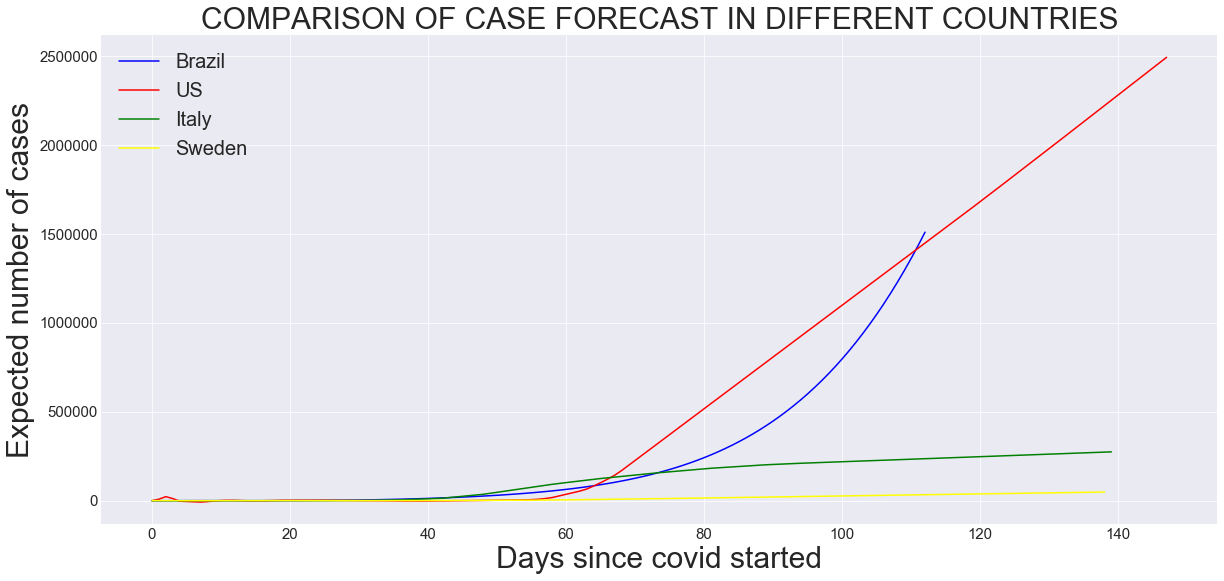

In [144]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')

plt.title('COMPARISON OF CASE FORECAST IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


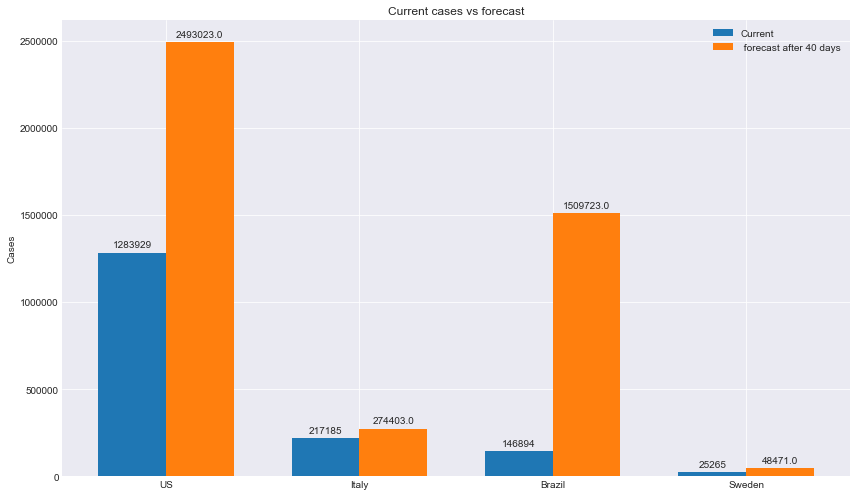

In [145]:
labels = ['US', 'Italy', 'Brazil', 'Sweden']
atualmente = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
apos_40 = [pred_caso_eua[-1], pred_caso_italia[-1], pred_caso_br[-1],  pred_caso_suecia[-1]]
apos_40 = [round(m, 0) for m in apos_40]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='Current')
rects2 = ax.bar(x + width/2, apos_40, width, label=' forecast after 40 days')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Current cases vs forecast')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [146]:
print('comparison of case forecast in the 4 countries')
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2208057" data-url="https://flo.uri.sh/visualisation/2208057/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

comparison of case forecast in the 4 countries


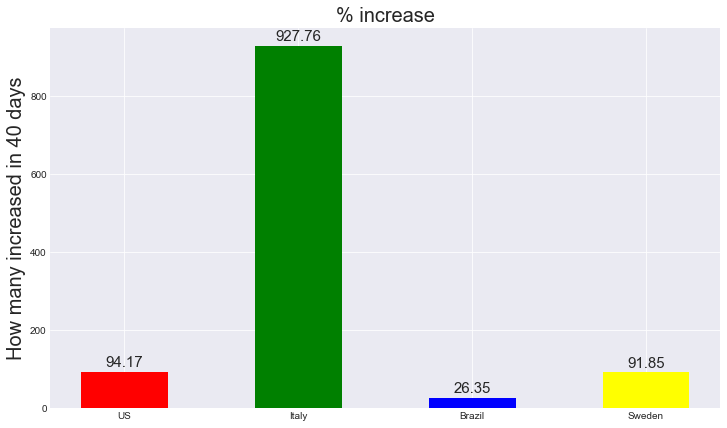

In [147]:
eua_porc = round(((pred_caso_eua[-1] - confirmados_eua)/ confirmados_eua)*100 , 2)
br_porc =  round(((pred_caso_br[-1] - confirmados_brasil)/ confirmados_brasil)*100, 2)
it_porc =  round(((pred_caso_italia[-1] - confirmados_italia)/ confirmados_italia)*100, 2)
su_porc =  round(((pred_caso_suecia[-1] - confirmados_suecia)/ confirmados_suecia)*100, 2)


fig = plt.figure(figsize=(12, 7))
paises = ['US', 'Italy', 'Brazil', 'Sweden']
numeros = [eua_porc,br_porc,it_porc,su_porc]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('How many increased in 40 days', size = 20)
plt.title('% increase', size=20)
plt.show()

In [148]:
p1 = figure(plot_width=800, plot_height=550, title="Expected trajectory for covid-19 logarithmic",
             y_axis_type="linear", x_range=(80,190))
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Days'
p1.yaxis.axis_label = 'Progression of cases (logarithmic scale)'
p1.xaxis.minor_tick_line_width = 0


p1.line(np.squeeze(futuro_brasil)[40:], pred_caso_br[40:], color='#3E4CC3', 
        legend_label='Brazil', line_width=1)
p1.circle(futuro_brasil[-1], pred_caso_br[-1], fill_color="white", size=5)

p1.line(np.squeeze(futuro_eua)[75:], pred_caso_eua[75:], color='#F54138', 
        legend_label='United States', line_width=1)
p1.circle(futuro_eua[-1], pred_caso_eua[-1], fill_color="white", size=5)


p1.line(np.squeeze(futuro_suecia)[66:], pred_caso_suecia[66:], color='#DBAE23', 
        legend_label='Sweden', line_width=1)
p1.circle(futuro_suecia[-1], pred_caso_suecia[-1], fill_color="white", size=5)


p1.line(np.squeeze(futuro_italia)[67:], pred_caso_italia[67:], color='#3EC358', 
        legend_label='Italy', line_width=1)
p1.circle(futuro_italia[-1], pred_caso_italia[-1], fill_color="white", size=5)



p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

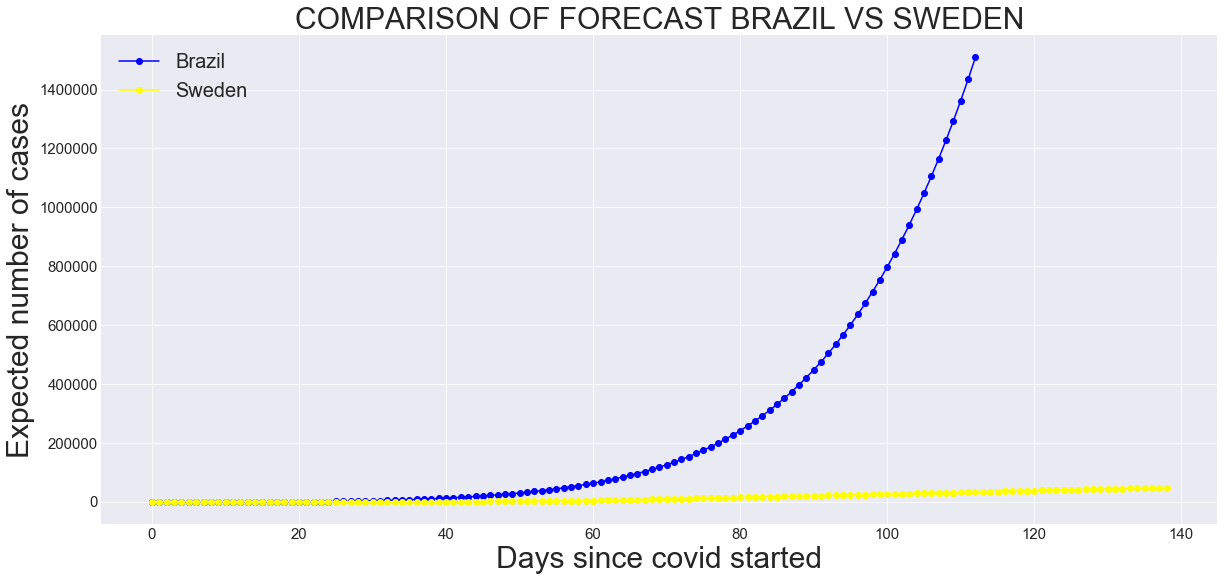

In [149]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, marker='o',  color='blue')
plt.plot(futuro_suecia, pred_caso_suecia, marker='o',  color='yellow')


plt.title('COMPARISON OF FORECAST BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


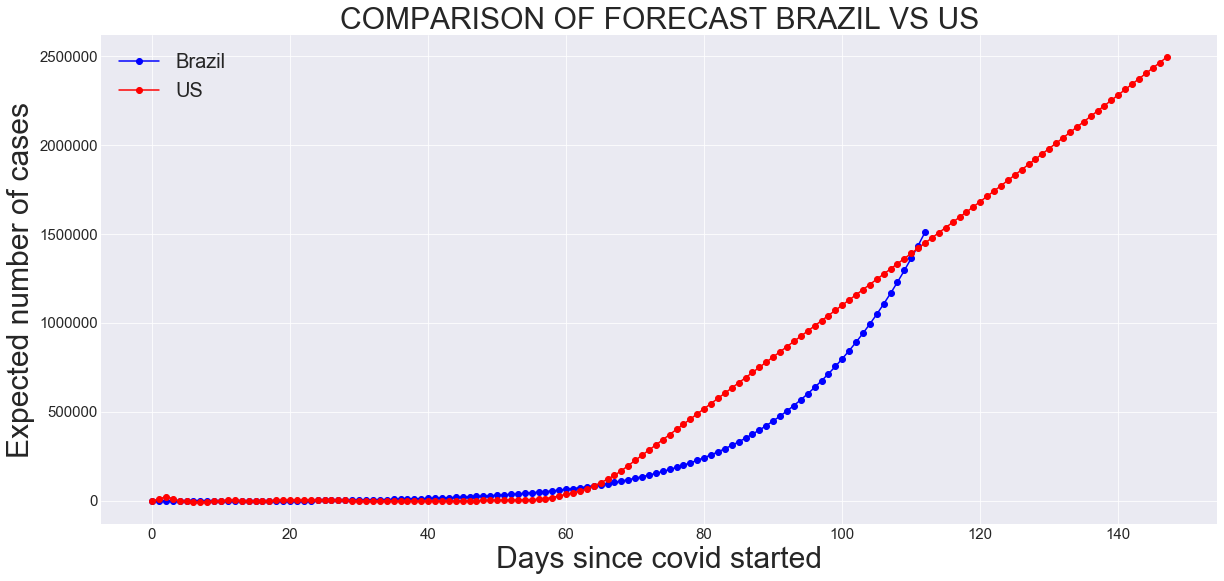

In [150]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, marker='o',  color='blue')
plt.plot(futuro_eua, pred_caso_eua, marker='o',  color='red')

plt.title('COMPARISON OF FORECAST BRAZIL VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['Brazil', 'US'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


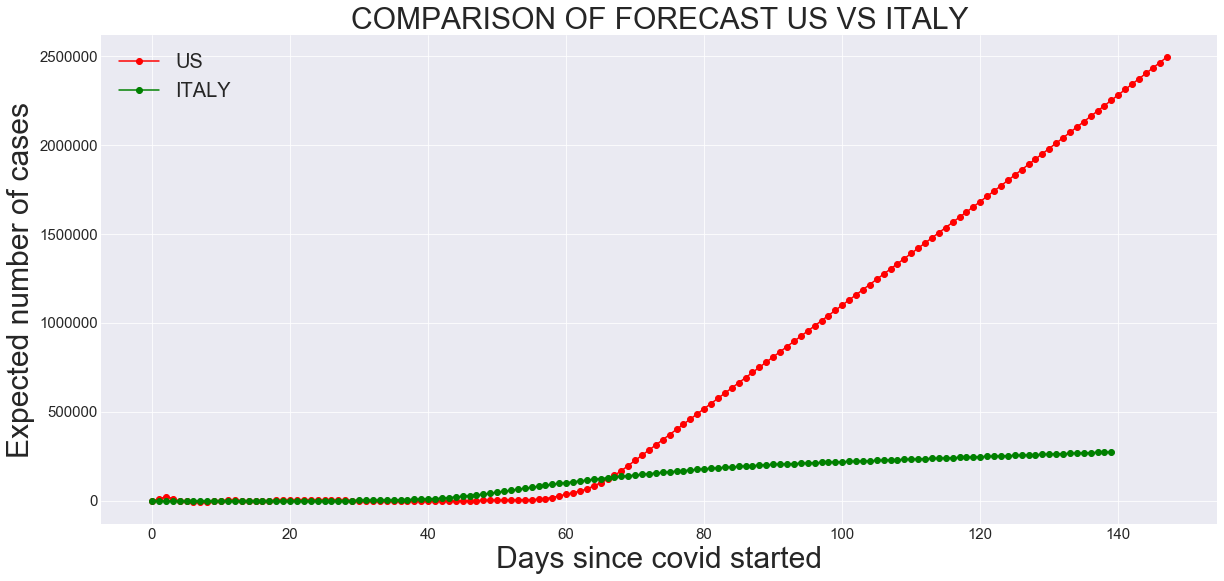

In [151]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_eua, pred_caso_eua, marker='o',  color='red')
plt.plot(futuro_italia, pred_caso_italia, marker='o',  color='green')


plt.title('COMPARISON OF FORECAST US VS ITALY', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of cases', size = 30)
plt.legend(['US', 'ITALY'],  prop={'size': 20}, loc="upper left")

plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


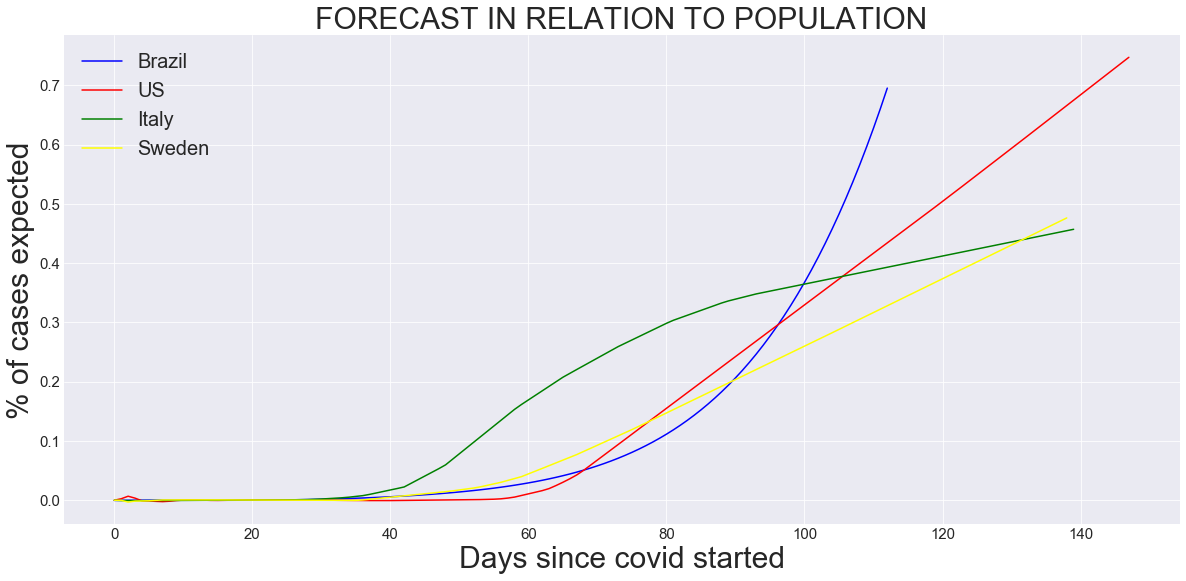

In [152]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_caso_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_caso_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_caso_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_caso_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('FORECAST IN RELATION TO POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of cases expected', size = 30)
plt.legend(['Brazil', 'US', 'Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


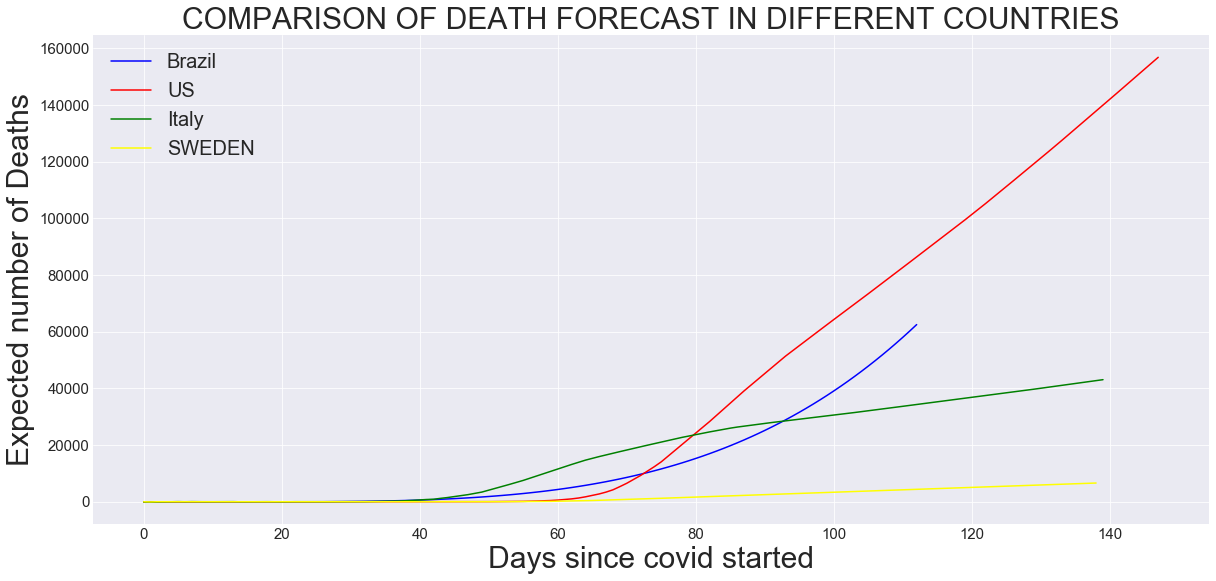

In [153]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARISON OF DEATH FORECAST IN DIFFERENT COUNTRIES', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Brazil', 'US','Italy', 'SWEDEN'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


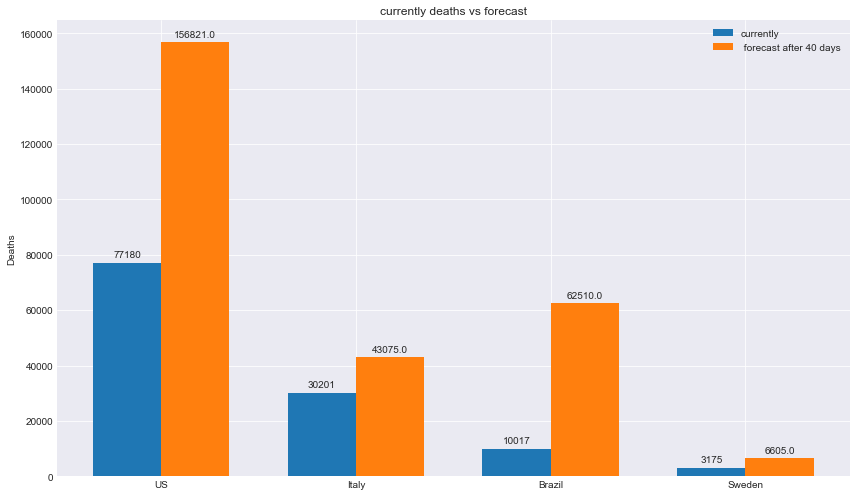

In [154]:
labels = ['US', 'Italy', 'Brazil', 'Sweden']
atualmente = [mortos_eua, mortos_italia, mortos_brasil, mortos_suecia]
apos_40 = [pred_mortes_eua[-1], pred_mortes_italia[-1], pred_mortes_br[-1],  pred_mortes_suecia[-1]]
apos_40 = [round(m, 0) for m in apos_40]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='currently')
rects2 = ax.bar(x + width/2, apos_40, width, label=' forecast after 40 days')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deaths')
ax.set_title('currently deaths vs forecast')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [155]:
print('death forecast 4 country')
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2288388" data-url="https://flo.uri.sh/visualisation/2288388/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

death forecast 4 country


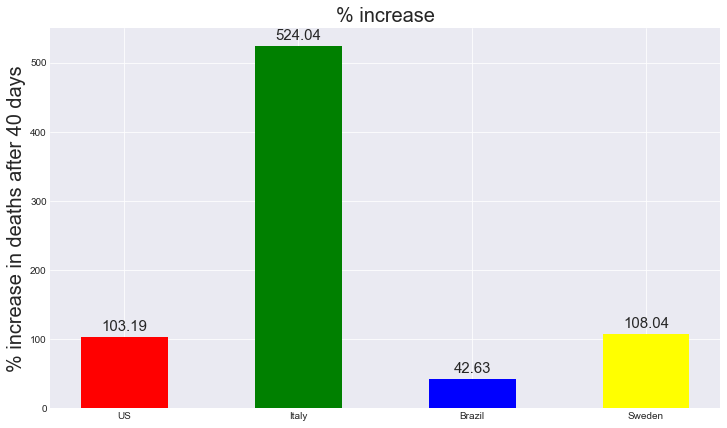

In [156]:
eua_porc = round(((pred_mortes_eua[-1] - mortos_eua)/ mortos_eua)*100 , 2)
br_porc =  round(((pred_mortes_br[-1] - mortos_brasil)/ mortos_brasil)*100, 2)
it_porc =  round(((pred_mortes_italia[-1] - mortos_italia)/ mortos_italia)*100, 2)
su_porc =  round(((pred_mortes_suecia[-1] - mortos_suecia)/ mortos_suecia)*100, 2)


fig = plt.figure(figsize=(12, 7))
paises = ['US', 'Italy', 'Brazil', 'Sweden']
numeros = [eua_porc,br_porc,it_porc,su_porc]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('% increase in deaths after 40 days', size = 20)
plt.title('% increase', size=20)
plt.show()

In [157]:
p1 = figure(plot_width=800, plot_height=550, title="Expected trajectory for logarithmic covid-19 deaths",
             y_axis_type="linear", x_range=(75,190))
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Days'
p1.yaxis.axis_label = 'Deaths progression(logarithmic scale)'
p1.xaxis.minor_tick_line_width = 0


p1.line(np.squeeze(futuro_brasil)[40:], pred_mortes_br[40:], color='#3E4CC3', 
        legend_label='Brazil', line_width=1)
p1.circle(futuro_brasil[-1], pred_mortes_br[-1], fill_color="white", size=5)

p1.line(np.squeeze(futuro_eua)[75:], pred_mortes_eua[75:], color='#F54138', 
        legend_label='United States', line_width=1)
p1.circle(futuro_eua[-1], pred_mortes_eua[-1], fill_color="white", size=5)


p1.line(np.squeeze(futuro_suecia)[66:], pred_mortes_suecia[66:], color='#DBAE23', 
        legend_label='Sweden', line_width=1)
p1.circle(futuro_suecia[-1], pred_mortes_suecia[-1], fill_color="white", size=5)


p1.line(np.squeeze(futuro_italia)[67:], pred_mortes_italia[67:], color='#3EC358', 
        legend_label='Italy', line_width=1)
p1.circle(futuro_italia[-1], pred_mortes_italia[-1], fill_color="white", size=5)



p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

<Figure size 864x504 with 0 Axes>

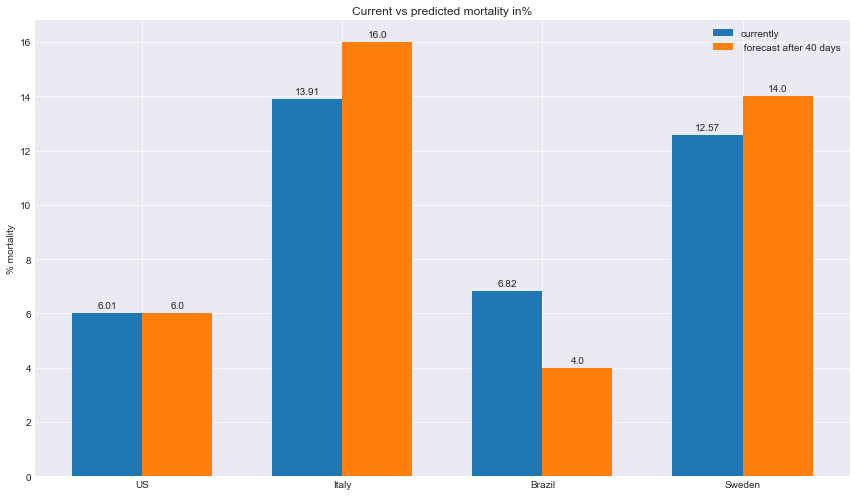

In [158]:
fig = plt.figure(figsize=(12, 7))
labels = ['US', 'Italy', 'Brazil', 'Sweden']
atualmente = [(mortos_eua/confirmados_eua)*100, (mortos_italia/confirmados_italia) *100, 
           (mortos_brasil/confirmados_brasil)*100, (mortos_suecia/confirmados_suecia)*100]
atualmente = [round(num, 2) for num in atualmente]
apos_40 = [(pred_mortes_eua[-1]/pred_caso_eua[-1])*100, (pred_mortes_italia[-1]/pred_caso_italia[-1])*100,
           (pred_mortes_br[-1]/ pred_caso_br[-1])*100, (pred_mortes_suecia[-1]/pred_caso_suecia[-1])*100]
apos_40 = [round(m, 0) for m in apos_40]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='currently')
rects2 = ax.bar(x + width/2, apos_40, width, label=' forecast after 40 days')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% mortality')
ax.set_title('Current vs predicted mortality in%')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

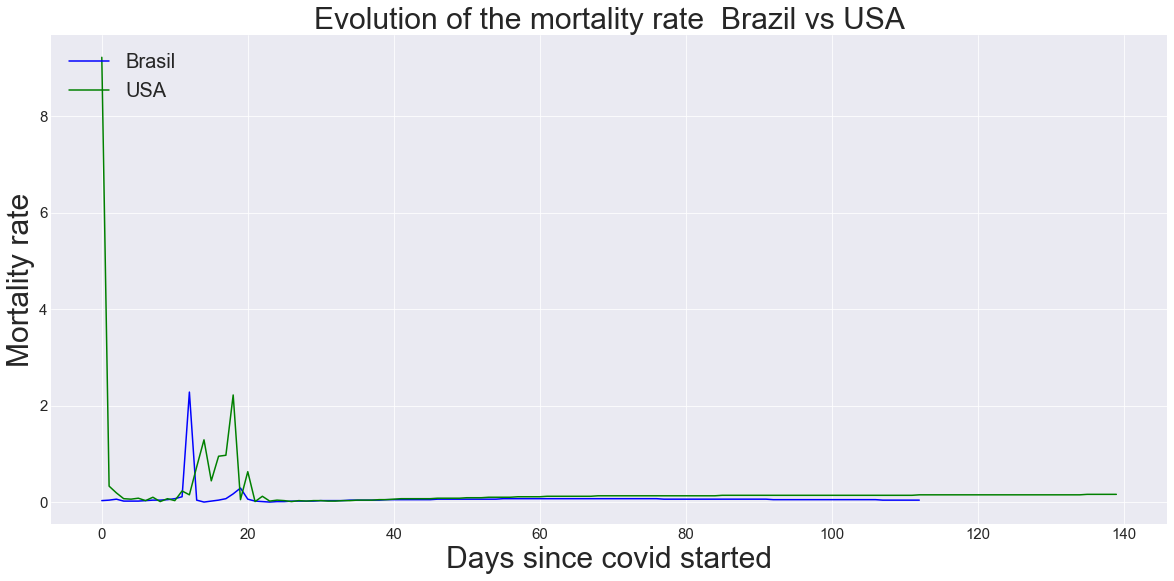

In [159]:
plt.figure(figsize=(20, 9))
mort_br = [round(abs((float(p) / float(r))), 2) if p != 0 and r != 0 else 0 for p,r in zip(pred_mortes_br, pred_caso_br)]
mort_eua = [round(abs((float(p) / float(r))), 2) if p != 0 and r != 0 else 0 for p,r in zip(pred_mortes_eua, pred_caso_eua)]
mort_it = [round(abs((float(p) / float(r))), 2) if p != 0 and r != 0 else 0 for p,r in zip(pred_mortes_italia, pred_caso_italia)]
mort_su = [round(abs((float(p) / float(r))), 2) if p != 0 and r != 0 else 0 for p,r in zip(pred_mortes_suecia, pred_caso_suecia)]


plt.plot(futuro_brasil, mort_br, color='blue')
#plt.plot(futuro_eua, mort_eua, color='red')
plt.plot(futuro_italia, mort_it, color='green')
#plt.plot(futuro_suecia, mort_su, color='yellow')

plt.title('Evolution of the mortality rate  Brazil vs USA', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Mortality rate', size = 30)
plt.legend(['Brasil', 'USA'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


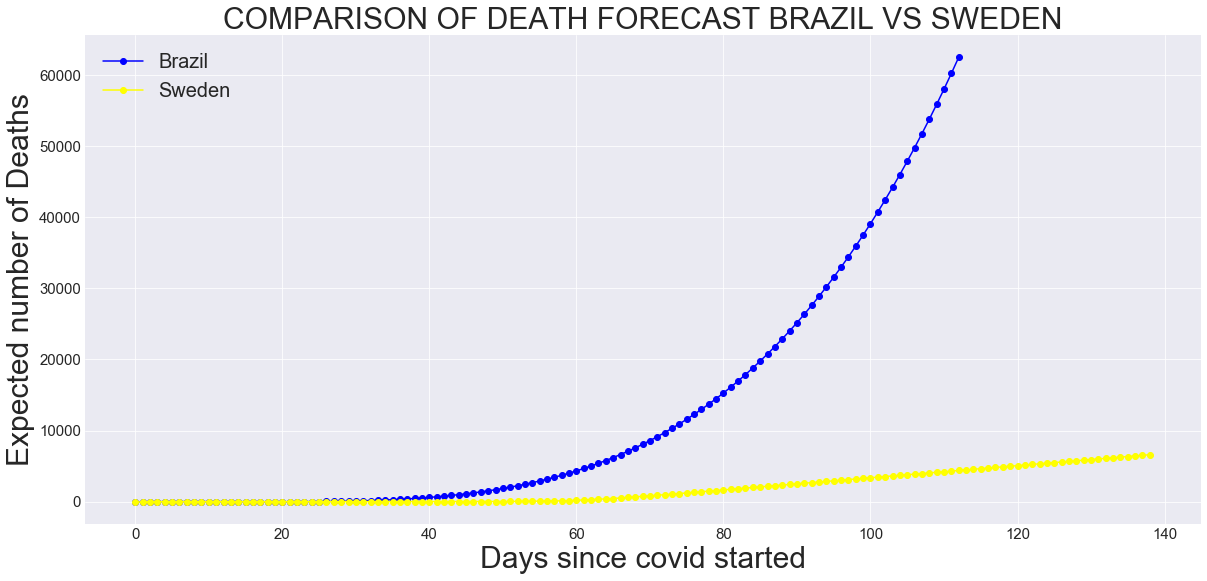

In [160]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, marker='o',  color='blue')
plt.plot(futuro_suecia, pred_mortes_suecia, marker='o',  color='yellow')

plt.title('COMPARISON OF DEATH FORECAST BRAZIL VS SWEDEN', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Brazil', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


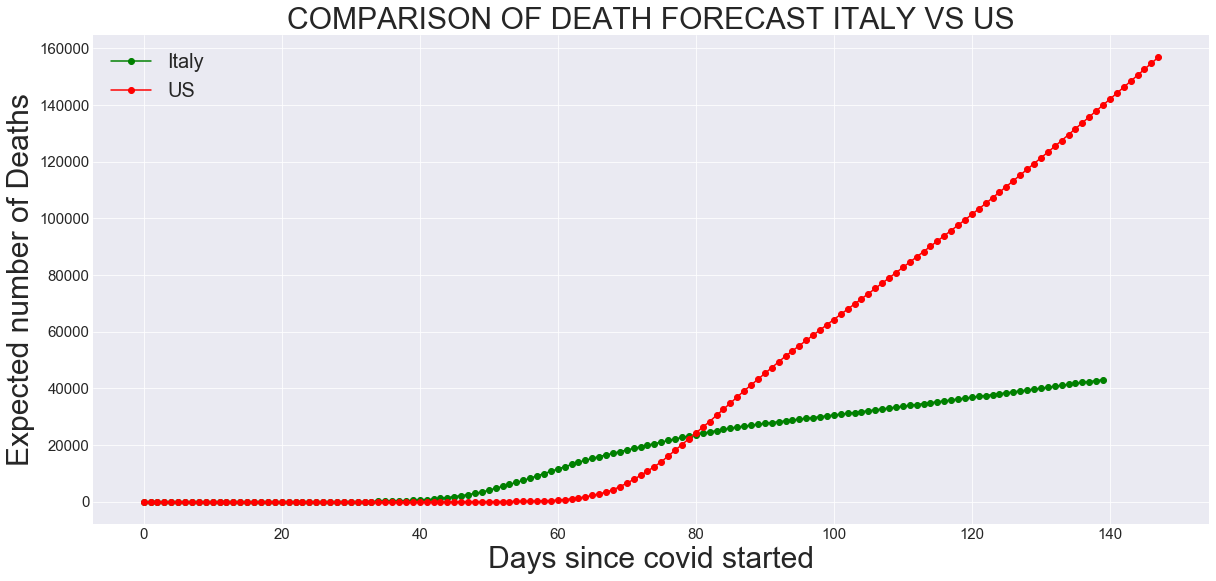

In [161]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_italia, pred_mortes_italia, marker='o',  color='green')
plt.plot(futuro_eua, pred_mortes_eua, marker='o',  color='red')

plt.title('COMPARISON OF DEATH FORECAST ITALY VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Italy', 'US'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


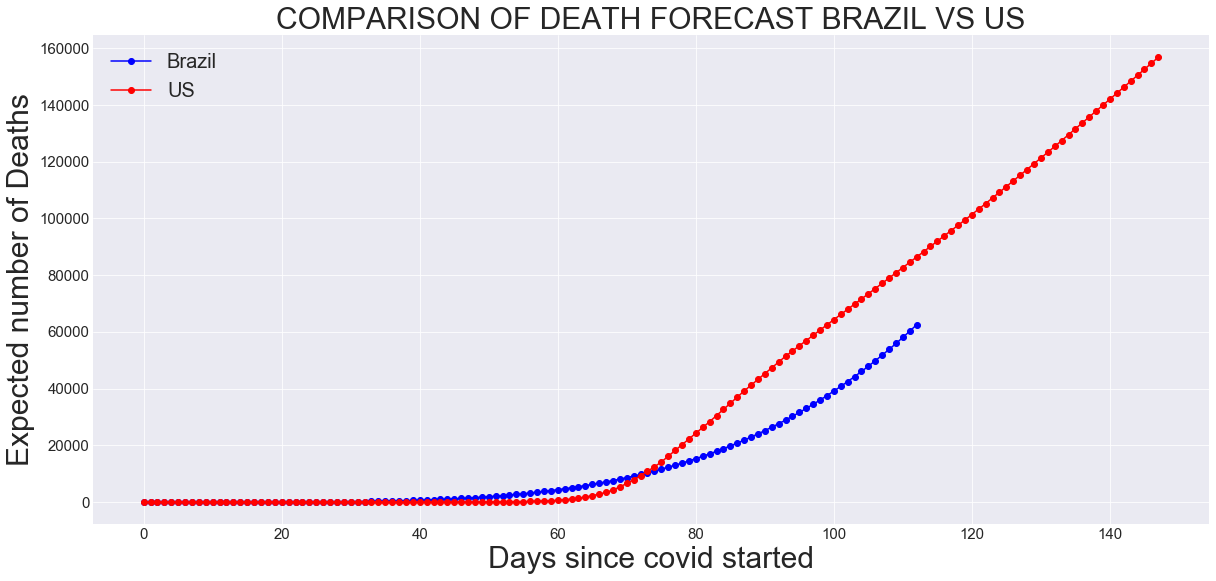

In [162]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, marker='o',  color='blue')
plt.plot(futuro_eua, pred_mortes_eua, marker='o',  color='red')

plt.title('COMPARISON OF DEATH FORECAST BRAZIL VS US', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('Expected number of Deaths', size = 30)
plt.legend(['Brazil', 'US'],  prop={'size': 20}, loc="upper left")



plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


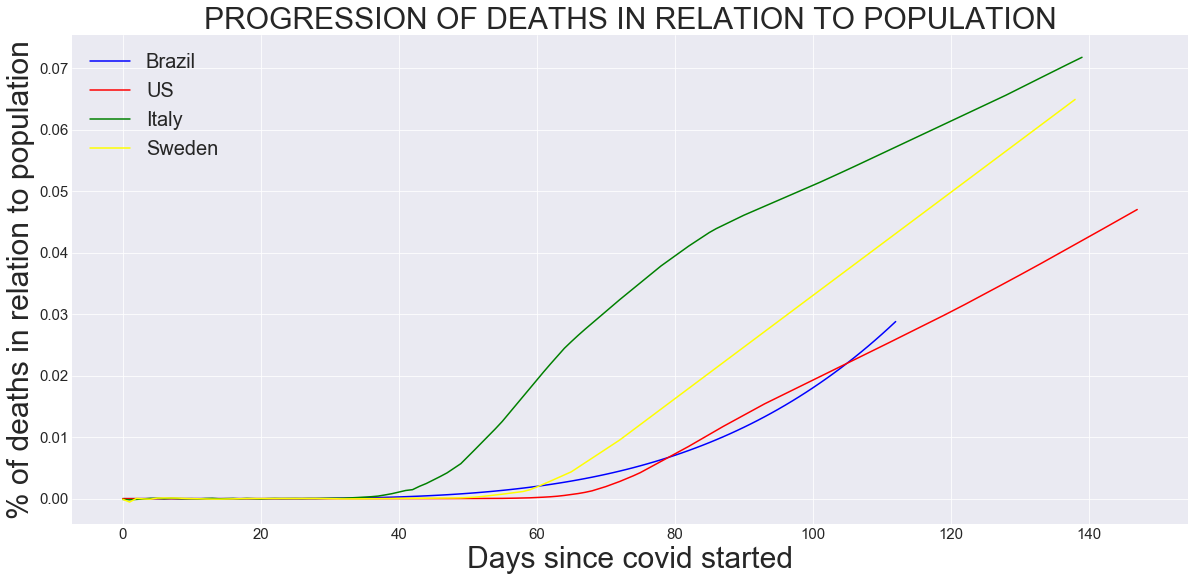

In [163]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_mortes_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('PROGRESSION OF DEATHS IN RELATION TO POPULATION', size=30)
plt.xlabel('Days since covid started', size = 30)
plt.ylabel('% of deaths in relation to population', size = 30)
plt.legend(['Brazil', 'US','Italy', 'Sweden'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# About Me

Hello, I am Lucas Marchiori and currently (04/2020) I am studying the 3rd semester of Computer Engineering at the Federal University of São Carlos (UFSCar), and I have been in the computer business since high school, where I was a computer technician at Etec de Nova Odessa.

Despite having been in the computing area for a long time, I recently found myself in the data science area,  that  is my first project in this area, where I decided to use the quarantine free time to learn a little about this area , so vast that it has interested me more and more.

Currently I have been looking to study more about data science, machine learning and its "sub divisions"

Some links:

My github: https://bit.ly/GitLucas

My Linkedin: https://bit.ly/2XJR5Z0


email for questions or suggestions: lucas@estudante.ufscar.br